### Installation and set up of Snscrape, Libraries 



In [1]:
!pip3 install git+https://github.com/JustAnotherArchivist/snscrape.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/JustAnotherArchivist/snscrape.git to /tmp/pip-req-build-az6qs4tb
  Running command git clone --filter=blob:none --quiet https://github.com/JustAnotherArchivist/snscrape.git /tmp/pip-req-build-az6qs4tb
  Resolved https://github.com/JustAnotherArchivist/snscrape.git to commit c3b216c3cb8593513a018eb3ec4fd6f18d3aba5b
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for snscrape: filename=snscrape-0.6.2.20230321.dev39+gc3b216c-py3-none-any.whl size=73725 sha256=262be281580f3fac6bb0a6f287cc122646843c44f359f3f81b60296c683037d7
  Stored in directory: /tmp/pip-ephem-wheel-cache-za7odvob/wheels/05/e9/f7/57056e7c7e44b1feed932fa49fdec9d706c4f563e37160ab74
Successfully built snscrape


In [2]:
!pip install vaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 3.2 MB/s eta 0:00:00


In [3]:
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.stattools import grangercausalitytests
from pandas.tseries.offsets import BDay
from statsmodels.stats.diagnostic import acorr_ljungbox
from datetime import timedelta
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import os
import numpy as np
import pandas as pd
import snscrape.modules.twitter as sntwitter
import csv
from datetime import datetime
import matplotlib.pyplot as plt

In [4]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 51.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 25.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 83.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 69.2 MB/s eta 0:00:00


### Deciding on basis for tweet extraction

***We have select ten twitter handles of influencers and personalities who are known to have had significant impact on trader behavior in the stock market. For each handle, we have also tried to connect in to the stocks they mainly tweet about/ hold interest in / influence.*** 

**Elon Musk (@elonmusk):**

Stock:
- Tesla, Inc. (TSLA)

Justification for Stock Selection:
- Elon Musk is the CEO of Tesla, Inc., and his tweets have a significant impact on Tesla's stock price and overall market sentiment. As his own company, Tesla, Inc. is directly influenced by his actions and statements, it is a relevant stock to consider.

Cutoff Date: January 1, 2020

Justification for Cutoff Date:
- Selecting a cutoff date of January 1, 2020, allows for the inclusion of significant events like the COVID-19 pandemic and subsequent market recovery. This timeframe enables the analysis of the impact of Elon Musk's tweets on Tesla's stock performance during these market-changing events.
____________________________________________________________
**Chamath Palihapitiya (@chamath):**

Stocks:

- Virgin Galactic Holdings, Inc. (SPCE)
- Clover Health Investments Corp. (CLOV)
- SoFi Technologies Inc. (SOFI)
- Palantir Technologies Inc. (PLTR)
- OpenDoor Technologies Inc. (OPEN)

Justification for Stock Selection:

- Chamath Palihapitiya is known for his involvement in special purpose acquisition companies (SPACs) and investments in disruptive technologies. The selected stocks are associated with companies that Chamath Palihapitiya has mentioned or invested in, making them relevant to his investment focus.

Cutoff Date: January 1, 2020

Justification for Cutoff Date:

- Setting the cutoff date to January 1, 2020, aligns with significant market events and the rise of SPACs and disruptive technology stocks. This timeframe enables the analysis of the impact of Chamath Palihapitiya's tweets on these stocks during the surge of interest in SPACs and disruptive technologies.

____________________________________________________________

**Mark Cuban (@mcuban):**

Stocks:

- Amazon.com, Inc. (AMZN)
- Netflix, Inc. (NFLX)
- Uber Technologies, Inc. (UBER)
- DraftKings Inc. (DKNG)
- Deere & Company (DE)

Justification for Stock Selection:

- Mark Cuban has a diverse investment portfolio and often shares insights and opinions on various stocks, including technology giants like Amazon (AMZN) and Netflix (NFLX), as well as emerging sectors like ride-hailing with Uber (UBER) and sports betting with DraftKings (DKNG).

Cutoff Date: January 1, 2020

Justification for Cutoff Date:

- Selecting a cutoff date of January 1, 2020, allows for capturing significant market events and developments related to the stocks mentioned by Mark Cuban. This timeframe enables the analysis of the impact of Mark Cuban's tweets on these stocks during important market phases.
____________________________________________________________

**Jim Cramer (@jimcramer):**

Stocks:
- Advanced Micro Devices, Inc. (AMD)
- Amazon.com, Inc. (AMZN)
- Alphabet Inc. (GOOGL)
- Facebook, Inc. (FB)
- Nvidia Corporation (NVDA)

Justification for Stock Selection:

- Jim Cramer is the host of CNBC's "Mad Money," where he provides stock analysis and recommendations. The selected stocks are examples of companies that Jim Cramer has discussed or recommended on his show, making them relevant to his investment focus.

Cutoff Date: January 1, 2020

Justification for Cutoff Date:

- By setting the cutoff date to January 1, 2020, the analysis includes significant market events and aligns with key periods of Jim Cramer's stock recommendations and discussions. This timeframe enables the analysis of the impact of his tweets on these stocks during market-changing events.
____________________________________________________________

**Josh Brown (@ReformedBroker):**

Stocks:
- Microsoft Corporation (MSFT)
- JPMorgan Chase & Co. (JPM)
- The Home Depot, Inc. (HD)

Justification for Stock Selection:
- Josh Brown, known as the "Reformed Broker," is a well-respected financial advisor and commentator. The selected stocks represent companies that Josh Brown has mentioned or shown interest in, reflecting his investment focus and providing a basis for analyzing his influence on these stocks.

Cutoff Date: January 1, 2020

Justification for Cutoff Date:
- Setting the cutoff date to January 1, 2020, aligns with significant market events and captures Josh Brown's views and opinions during important market phases.
____________________________________________________________
 
**Liz Ann Sonders (@LizAnnSonders):**

Stocks:
- Apple Inc. (AAPL)
- Amazon.com, Inc. (AMZN)
- Alphabet Inc. (GOOGL)
- Facebook, Inc. (FB)
- Microsoft Corporation (MSFT)

Justification for Stock Selection:
- Liz Ann Sonders is the Chief Investment Strategist at Charles Schwab and a prominent market commentator. The selected stocks represent companies that Liz Ann Sonders has discussed or highlighted in her market analysis, making them relevant for analyzing her influence on these stocks.

Cutoff Date: January 1, 2020

Justification for Cutoff Date:
- By setting the cutoff date to January 1, 2020, the analysis includes significant market events and aligns with key periods of Liz Ann Sonders' market commentary and analysis.

____________________________________________________________

Bespoke Investment Group (@bespokeinvest):

Stocks:
- Invesco QQQ Trust (QQQ)
- SPDR S&P 500 ETF Trust (SPY)
- iShares Russell 2000 ETF (IWM)

Justification for Stock Selection:
- Bespoke Investment Group is a well-known financial research and analytics firm. The selected stocks are representative of major ETFs that Bespoke Investment Group often tracks and provides analysis for, making them relevant for analyzing their influence on these stock market indices.

Cutoff Date: January 1, 2010

Justification for Cutoff Date:
- By selecting a cutoff date of January 1, 2010, the analysis covers a substantial time period and captures significant market events. This timeframe enables the analysis of the impact of Bespoke Investment Group's views and analysis on these stock market indices over a significant period.

____________________________________________________________

Jeffrey Gundlach (@TruthGundlach):

Stocks:
- iShares iBoxx $ Investment Grade Corporate Bond ETF (LQD)
- SPDR Gold Trust (GLD)
- iShares 20+ Year Treasury Bond ETF (TLT)

Justification for Stock Selection:
- Jeffrey Gundlach is a renowned bond investor and founder of DoubleLine Capital. The selected stocks represent ETFs associated with bond and gold investments that Jeffrey Gundlach has mentioned or discussed, making them relevant for analyzing his influence on these assets.

Cutoff Date: January 1, 2010

Justification for Cutoff Date:
- By selecting a cutoff date of January 1, 2010, the analysis covers a substantial time period and captures significant market events. This timeframe enables the analysis of the impact of Jeffrey Gundlach's views and recommendations on these bond and gold investments over a significant period.



### Scraping tweets

In [ ]:
accounts = [
    ('@elonmusk', ' since:2020-01-01 until:2023-05-31'),
    ('@chamath', ' since:2020-01-01 until:2023-05-31'),
    ('@mcuban', ' since:2020-01-01 until:2023-05-31'),
    ('@peterlynch', ' since:2000-01-01 until:2023-05-31'),
    ('@ReformedBroker', ' since:2020-01-01 until:2023-05-31'),
    ('@LizAnnSonders', ' since:2020-01-01 until:2023-05-31'),
    ('@bespokeinvest', ' since:2020-01-01 until:2023-05-31'),
    ('@TruthGundlach', ' since:2020-01-01 until:2023-05-31')
    ]


In [ ]:
tweets = []
completed_keywords = []

# Load completed keywords
completed_keywords_file = 'completed_keywords_.txt'
if os.path.exists(completed_keywords_file):
    with open(completed_keywords_file, 'r') as f:
        completed_keywords = f.read().splitlines()
else:
    completed_keywords = []

# Scrape tweets for each keyword
for account, time_range in accounts:
    if account in completed_keywords:
        continue

    tweet_count = 0
    success = False
    while not success:
        try:
            for tweet in sntwitter.TwitterSearchScraper('from:' + account + time_range).get_items():
                tweets.append([tweet.date, tweet.user.username, tweet.content, tweet.likeCount, tweet.retweetCount])

                tweet_count += 1
                if tweet_count >= 1000000:
                    break

            # Save completed keyword
            with open(completed_keywords_file, 'a') as f:
                f.write(account + '\n')

            # Save tweets to a CSV file named as tweet_nameofhandle.csv
            filename = 'tweet_' + account[1:] + '.csv'
            df = pd.DataFrame(tweets, columns=['Date', 'username', 'tweet', 'num_of_likes', 'num_of_retweet'])
            df.to_csv(filename, mode='a', header=not os.path.exists(filename), index=False)

            tweets.clear()
            success = True

        except Exception as e:
            print(f'Error scraping tweets for {account}: {e}')
            continue


<ipython-input-6-aaf3ee21b2f3>:22: DeprecatedFeatureWarning: content is deprecated, use rawContent instead
  tweets.append([tweet.date, tweet.user.username, tweet.content, tweet.likeCount, tweet.retweetCount])


KeyboardInterrupt: ignored

In [ ]:
# Path to the directory containing the CSV files
directory_path = '/content/'

# Iterate over each CSV file in the directory
for filename in os.listdir(directory_path):
    if filename.endswith('.csv'):
        file_path = os.path.join(directory_path, filename)
        
        # Read the CSV file using pandas
        df = pd.read_csv(file_path)
        
        # Print the shape of the DataFrame
        print(f"File: {filename} | Shape: {df.shape}")

File: tweet_LizAnnSonders.csv | Shape: (15693, 5)
File: tweet_TruthGundlach.csv | Shape: (443, 5)
File: tweet_elonmusk.csv | Shape: (15421, 5)
File: tweet_jimcramer.csv | Shape: (17636, 5)
File: tweet_WarrenBuffett.csv | Shape: (0, 5)
File: tweet_peterlynch.csv | Shape: (0, 5)
File: tweet_ReformedBroker.csv | Shape: (57, 5)
File: tweet_mcuban.csv | Shape: (3459, 5)
File: tweet_chamath.csv | Shape: (2937, 5)
File: tweet_bespokeinvest.csv | Shape: (10237, 5)


####Going to try another way for Warren Buffet

In [ ]:
# List of selected stocks with full form names and commonly used lowercase names
selected_stocks = [
    ('Apple Inc.', 'apple'),
    ('Bank of America Corporation', 'bank of america', 'boa'),
    ('The Coca-Cola Company', 'coca-cola', 'coke'),
    ('American Express Company', 'american express', 'amex'),
    ('Moody\'s Corporation', 'moody\'s')
]

# Generate search terms for Warren Buffett including different variations
warren_buffett_terms = ['Warren Buffett', 'Warren', 'WARREN BUFFETT']

# Generate search terms for selected stocks including different variations
stock_search_terms = [name.lower() for name_set in selected_stocks for name in name_set]

# Combine all search terms
search_terms = warren_buffett_terms + stock_search_terms

# Generate search query
search_query = ' OR '.join(search_terms)

# Specify the date range
start_date = datetime(2010, 1, 1)
end_date = datetime.today().strftime('%Y-%m-%d')

# Maximum number of tweets to retrieve
max_tweets = 100

# Retrieve tweets
tweets = []
for tweet in sntwitter.TwitterSearchScraper(search_query + f' since:{start_date} until:{end_date}').get_items():
    tweets.append([tweet.date, tweet.content])

    if len(tweets) >= max_tweets:
        break

# Save tweets to a CSV file
filename = 'tweets.csv'
with open(filename, 'w', newline='', encoding='utf-8') as f:
    writer = csv.writer(f)
    writer.writerow(['Date', 'Content'])
    writer.writerows(tweets)

print("Tweets saved successfully to tweets.csv.")


Tweets saved successfully to tweets.csv.


In [ ]:
search_query

"Warren Buffett OR Warren OR WARREN BUFFETT OR apple inc. OR apple OR bank of america corporation OR bank of america OR boa OR the coca-cola company OR coca-cola OR coke OR american express company OR american express OR amex OR moody's corporation OR moody's"

### Mounting to Google Drive


In [5]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


Run only once (dont run again as files are already on Drive)

In [ ]:
import os
import shutil

# Path to the directory containing the CSV files
directory_path = '/content/'

# Destination folder in Google Drive
drive_folder = '/content/drive/MyDrive/FInancial Econ/Tweets'

# Copy each CSV file to the destination folder in Google Drive
for filename in os.listdir(directory_path):
    if filename.endswith('.csv'):
        file_path = os.path.join(directory_path, filename)
        destination_path = os.path.join(drive_folder, filename)
        
        shutil.copy(file_path, destination_path)
        print(f"Uploaded file: {filename}")

print("All CSV files uploaded successfully.")


Uploaded file: daily_sentiment_index_musk.csv
All CSV files uploaded successfully.


### Functions for Analysis


In [6]:
import re

def preprocess_tweets(dataframe):
    df = dataframe.copy()
    # Convert the Date column to a simple date format
    df['Date'] = pd.to_datetime(df['Date']).dt.date
    
    # Drop the username column
    df = df.drop('username', axis=1)
    
    # Process the tweet column for sentiment analysis
    df['tweet'] = df['tweet'].apply(lambda x: re.sub(r'(https?://)?(www\.)?[a-zA-Z0-9_-]+\.[a-zA-Z0-9_-]+(/[\w\.-]*)*', '', x))  # Remove URLs
    df['tweet'] = df['tweet'].apply(lambda x: re.sub(r'@[^\s]+', '', x))  # Remove mentions
    df['tweet'] = df['tweet'].apply(lambda x: re.sub(r'#', '', x))  # Remove hashtags
    df['tweet'] = df['tweet'].apply(lambda x: re.sub(r'[^a-zA-Z]', ' ', x))  # Remove non-alphabetic characters
    df['tweet'] = df['tweet'].apply(lambda x: x.lower())  # Convert to lowercase
    
    # Convert the retweets and likes columns to float
    df['num_of_likes'] = df['num_of_likes'].astype(float)
    df['num_of_retweet'] = df['num_of_retweet'].astype(float)
    
    return df


In [7]:
import seaborn as sns

def plot_count_of_tweets(dataframe):
    # Group the DataFrame by date and count the number of tweets per date
    tweets_per_date = dataframe.groupby('Date').size().reset_index(name='Number of Tweets')

    # Set the style using Seaborn
    sns.set(style='darkgrid')

    # Create a line plot
    sns.lineplot(data=tweets_per_date, x='Date', y='Number of Tweets')

    plt.xlabel('Date')
    plt.ylabel('Number of Tweets')
    plt.title('Number of Tweets per Date')

    # Rotate x-axis tick labels for better readability
    plt.xticks(rotation=45)

    # Display the plot
    plt.show()


In [8]:
def calculate_sentiment_index(df):
    # Sentiment Analysis: Calculate sentiment scores using VADER
    analyzer = SentimentIntensityAnalyzer()
    df['sentiment'] = df['tweet'].apply(lambda x: analyzer.polarity_scores(x)['compound'])

    # Aggregation: Group by date and calculate daily sentiment index
    daily_sentiment_index = df.groupby('Date')['sentiment'].mean().reset_index()

    # Additional analysis: Calculate number of tweets and words per tweet
    daily_sentiment_index['num_tweets'] = df.groupby('Date').size().values
    daily_sentiment_index['num_words_per_tweet'] = df['tweet'].apply(lambda x: len(x.split())).groupby(df['Date']).mean().values

    return daily_sentiment_index


In [9]:
def plot_daily_sentiment_index(df):
    plt.figure(figsize=(10, 6))
    
    sns.lineplot(data=df, x='Date', y='sentiment')
    
    plt.xlabel('Date')
    plt.ylabel('Sentiment Index')
    plt.title('Daily Sentiment Index Time Series')
    
    plt.xticks(rotation=45)
    
    plt.show()

In [10]:
def plot_acf_pacf(dataframe, lags=30):
    # Convert 'Date' column to datetime format
    dataframe['Date'] = pd.to_datetime(dataframe['Date'])

    # Set the style to use Seaborn
    sns.set(style='whitegrid')

    # Create the ACF plot
    fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize=(20, 6))
    plot_acf(dataframe['sentiment'], lags=lags, ax=axs[0])
    plot_pacf(dataframe['sentiment'], lags=lags, ax=axs[1], method='ywm')

    # Set the plot labels and title
    for ax in axs:
        ax.set_xlabel('Lags')

    axs[0].set_ylabel('Autocorrelation')
    axs[0].set_title('Autocorrelation Function (ACF)')
    axs[1].set_ylabel('Partial autocorrelation')
    axs[1].set_title('Partial autocorrelation Function (PACF)')

    # Show the plot
    plt.show()

In [11]:
from statsmodels.tsa.stattools import adfuller

def adf_test(data):
    result = adfuller(data)
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'{key}: {value}')


  The Ljung-Box test is used to assess the presence of autocorrelation in the residuals of a model. The test examines whether there is any significant correlation between the residuals at different lags. The test computes a test statistic and a corresponding p-value for each lag.

  The Ljung-Box test results provide information about the significance of autocorrelation at different lags. 
  The test statistic measures the strength of the autocorrelation, and the p-value indicates 
  the statistical significance of the autocorrelation.

  Taking the maximum lag from the Ljung-Box test results means considering the 
  lag with the highest autocorrelation among all the tested lags. This lag is the one
  that shows the strongest evidence of autocorrelation in the residuals.

  In the fit_models function, using the maximum lag from the Ljung-Box test results allows us to incorporate the lag that exhibits the most significant autocorrelation into the model fitting process.
  By including this lag in the model specification, we aim to capture and account for the observed autocorrelation
  in the time series data, leading to potentially better fitting and more accurate predictions.

In [12]:
def get_arma_aic_bic(values, p, d, q):
    arma_model = ARIMA(values, order=(p, d, q))
    arma_model_fit = arma_model.fit(method_kwargs={'maxiter':300})
    return arma_model_fit.aic, arma_model_fit.bic


def get_aic_bic_dict(values, p_max, d_max, q_max):

    data = {
        "aic": np.zeros((p_max+1, d_max+1, q_max+1)),
        "bic": np.zeros((p_max+1, d_max+1, q_max+1))
    }
    
    for p in range(p_max+1):
        for q in range(q_max+1):
            for d in range(d_max + 1):
                aic, bic = get_arma_aic_bic(values, p, d, q)
                data["aic"][p, d, q] = aic
                data["bic"][p, d, q] = bic
    return data

def plot_aic_bic_heatmap(aic_bic_dict):
    df_aic, df_bic = aic_bic_dict["aic"], aic_bic_dict["bic"]
    d_values = df_aic.shape[1]
    fig, axs = plt.subplots(nrows=d_values, ncols=2, figsize=(14, 12))
    
    for i, d in enumerate(range(d_values)):
        sns.heatmap(df_aic[:,i,:], ax = axs[i, 0], annot = df_aic[:,i,:].astype(int), cmap = sns.light_palette("seagreen", as_cmap=True, reverse=True), annot_kws={"fontsize":9}, fmt="d")    
        sns.heatmap(df_bic[:,i,:], ax = axs[i, 1], annot = df_bic[:,i,:].astype(int), cmap = sns.light_palette("seagreen", as_cmap=True, reverse=True), annot_kws={"fontsize":9}, fmt="d")

    for i, ax in enumerate(axs.reshape(-1)):
        d = i//2
        if i % 2 == 0:
            ax.set_title(f"AIC (d = {d})")
        else:
            ax.set_title(f"BIC (d = {d})")
        ax.set_xlabel("q")
        ax.set_ylabel("p")

    plt.tight_layout()


In [13]:
import yfinance as yf

def fetch_log_returns(tickers, start_date):
    '''
    -- Fetch log returns for the S&P 500
      log_returns_sp500 = fetch_log_returns("SP500", start_date="2020-01-01")

    -- Fetch log returns for specific stock tickers
      tickers = ["AAPL", "GOOGL", "MSFT"]
      log_returns_custom = fetch_log_returns(tickers, start_date="2020-01-01")

    '''

    if tickers == "SP500":
        # Fetch all the stock tickers in the S&P 500 index
        sp500_tickers = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]['Symbol'].tolist()
        tickers = sp500_tickers
    
    log_returns_dict = {}
    
    for ticker in tickers:
        # Download the historical data from Yahoo Finance
        ticker_data = yf.download(ticker, start=start_date, end=pd.Timestamp.today(), progress=False)

        # Extract the closing prices from the historical data
        closing_prices = ticker_data['Close']

        # Calculate the log returns
        log_returns = closing_prices.pct_change().dropna()
        log_returns = pd.Series(log_returns.values, index=log_returns.index)
        
        log_returns_dict[ticker] = log_returns
    
    return log_returns_dict


In [14]:
import yfinance as yf

def fetch_log_returns(tickers, start_date):
    """
    Fetch log returns for the specified stock tickers and add log returns of the S&P 500 index.

    Parameters:
        tickers (list or str): List of stock tickers or 'SP500' to include the S&P 500 index.
        start_date (str): Start date in 'YYYY-MM-DD' format.

    Returns:
        log_returns_dict (dict): Dictionary of Pandas Series with log returns for each ticker.
    """
    if isinstance(tickers, str) and tickers.upper() == "SP500":
        sp500_tickers = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]['Symbol'].tolist()
        tickers = sp500_tickers

    log_returns_dict = {}

    sp500_data = yf.download("^GSPC", start=start_date, end=pd.Timestamp.today(), progress=False)
    sp500_closing_prices = sp500_data['Close']
    sp500_log_returns = sp500_closing_prices.pct_change().dropna()
    sp500_log_returns = pd.Series(sp500_log_returns.values, index=sp500_log_returns.index)
    log_returns_dict["SP500"] = sp500_log_returns

    for ticker in tickers:
        ticker_data = yf.download(ticker, start=start_date, end=pd.Timestamp.today(), progress=False)
        closing_prices = ticker_data['Close']
        log_returns = closing_prices.pct_change().dropna()
        log_returns = pd.Series(log_returns.values, index=log_returns.index)
        log_returns_dict[ticker] = log_returns

    return log_returns_dict


In [15]:
def sentiment_returns_df(daily_sentiment_index, returns_df):
    num_columns = returns_df.shape[1] - 2  # Exclude 'Date' and 'SP500' columns
    returns_df['Average Return'] = returns_df.iloc[:, 2:(num_columns + 2)].mean(axis=1)
    sentiment_returns = pd.merge(daily_sentiment_index, returns_df, on='Date', how='inner')

    return sentiment_returns


In [16]:
def plot_sentiment_portfolio(sentiment_returns):
    fig, axs = plt.subplots(2, 1, figsize=(12, 8))

    # Plot sentiment time series
    ax_sentiment = axs[0]
    ax_sentiment.plot(sentiment_returns['Date'], sentiment_returns['sentiment'], label='Sentiment')
    ax_sentiment.set_xlabel('Date')
    ax_sentiment.set_ylabel('Sentiment')
    ax_sentiment.set_title('Sentiment Time Series')
    ax_sentiment.xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'))
    ax_sentiment.tick_params(axis='x', rotation=45)
    ax_sentiment.legend()

    # Plot average return
    ax_returns = axs[1]
    ax_returns.plot(sentiment_returns['Date'], sentiment_returns['Average Return'], label='Average Return')
    ax_returns.set_xlabel('Date')
    ax_returns.set_ylabel('Returns')
    ax_returns.set_title('Average Return Time Series')
    ax_returns.xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'))
    ax_returns.tick_params(axis='x', rotation=45)
    ax_returns.legend()

    fig.tight_layout()
    plt.show()


In [17]:
def plot_sentiment_sp500(sentiment_returns):
    fig, axs = plt.subplots(2, 1, figsize=(12, 8))

    # Plot sentiment time series
    ax_sentiment = axs[0]
    ax_sentiment.plot(sentiment_returns['Date'], sentiment_returns['sentiment'], label='Sentiment')
    ax_sentiment.set_xlabel('Date')
    ax_sentiment.set_ylabel('Sentiment')
    ax_sentiment.set_title('Sentiment Time Series')
    ax_sentiment.xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'))
    ax_sentiment.tick_params(axis='x', rotation=45)
    ax_sentiment.legend()

    # Plot S&P 500 time series
    ax_sp500 = axs[1]
    ax_sp500.plot(sentiment_returns['Date'], sentiment_returns['SP500'], label='S&P 500')
    ax_sp500.set_xlabel('Date')
    ax_sp500.set_ylabel('Returns')
    ax_sp500.set_title('S&P 500 Time Series')
    ax_sp500.xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'))
    ax_sp500.tick_params(axis='x', rotation=45)
    ax_sp500.legend()

    fig.tight_layout()
    plt.show()

In [18]:
def granger_causality_test_sp500(sentiment_returns):
    # Run the Granger causality test
    data = sentiment_returns[['sentiment', 'SP500']]
    results = grangercausalitytests(data, maxlag=1)

    # Print the test results
    for lag in results.keys():
        p_value = results[lag][0]['ssr_chi2test'][1]
        print(f"Lag: {lag}")
        print(f"Granger Causality Test p-value: {p_value}")

In [19]:
from statsmodels.tsa.stattools import grangercausalitytests

def granger_causality_test_portfolio(sentiment_returns):
    # Run the Granger causality test
    data = sentiment_returns[['sentiment', 'Average Return']]
    results = grangercausalitytests(data, maxlag=1)

    # Print the test results
    for lag in results.keys():
        p_value = results[lag][0]['ssr_chi2test'][1]
        print(f"Lag: {lag}")
        print(f"Granger Causality Test p-value: {p_value}")

### 1. Influencers x SNP 500 Analysis

Concating the tweets of all users

In [ ]:
import os
def concat_csv_files(directory):
    concatenated_df = None  # Initialize the concatenated DataFrame
    
    # Loop through each file in the directory
    for filename in os.listdir(directory):
        if filename.endswith('.csv'):  # Check if file is a CSV file
            file_path = os.path.join(directory, filename)  # Get the file path
            df = pd.read_csv(file_path)  # Read the CSV file into a DataFrame
            
            if concatenated_df is None:
                concatenated_df = df  # Assign the first DataFrame to concatenated_df
            else:
                concatenated_df = pd.concat([concatenated_df, df], ignore_index=True)  # Concatenate the current DataFrame with concatenated_df
    
    return concatenated_df


In [ ]:
tweets = concat_csv_files('./tweets')

Checking that all tweets are within same date range


In [ ]:
date_range = tweets['Date'].min(), tweets['Date'].max()
print("Min Date:", date_range[0])
print("Max Date:", date_range[1])

Min Date: 2020-01-01 05:32:58+00:00
Max Date: 2023-05-30 23:51:58+00:00


Preprocess the tweets

In [ ]:
tweets = preprocess_tweets(tweets)

Plotting the count of tweets


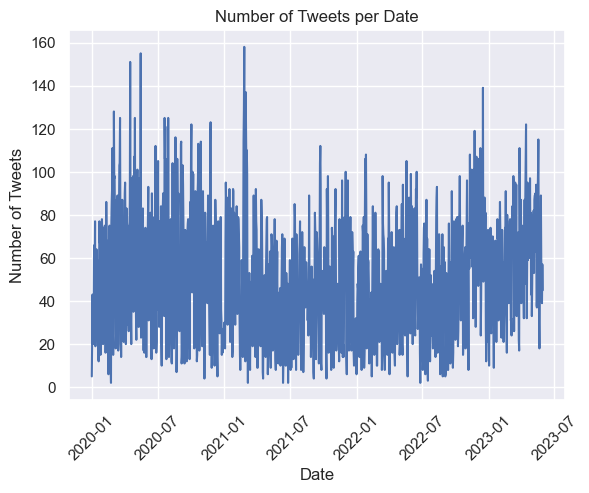

In [ ]:
plot_count_of_tweets(tweets)

In [ ]:
daily_sentiment_index = calculate_sentiment_index(tweets)
daily_sentiment_index

Date  sentiment  num_tweets  num_words_per_tweet
0     2020-01-01   0.166640           5            17.400000
1     2020-01-02   0.036029          21            19.904762
2     2020-01-03   0.168826          43            12.279070
3     2020-01-04   0.267295          20            18.250000
4     2020-01-05   0.116014          29            15.413793
...          ...        ...         ...                  ...
1241  2023-05-26   0.128490          59            20.016949
1242  2023-05-27   0.045322          51             4.431373
1243  2023-05-28   0.103362          39             7.948718
1244  2023-05-29   0.158012          57             9.192982
1245  2023-05-30   0.084627          45            20.866667

[1246 rows x 4 columns]

Descriptive Statistics

In [ ]:
print(daily_sentiment_index['sentiment'].describe())

count    1246.000000
mean        0.128468
std         0.086674
min        -0.260680
25%         0.074962
50%         0.126752
75%         0.173251
max         0.612150
Name: sentiment, dtype: float64


Daily Sentiment Index

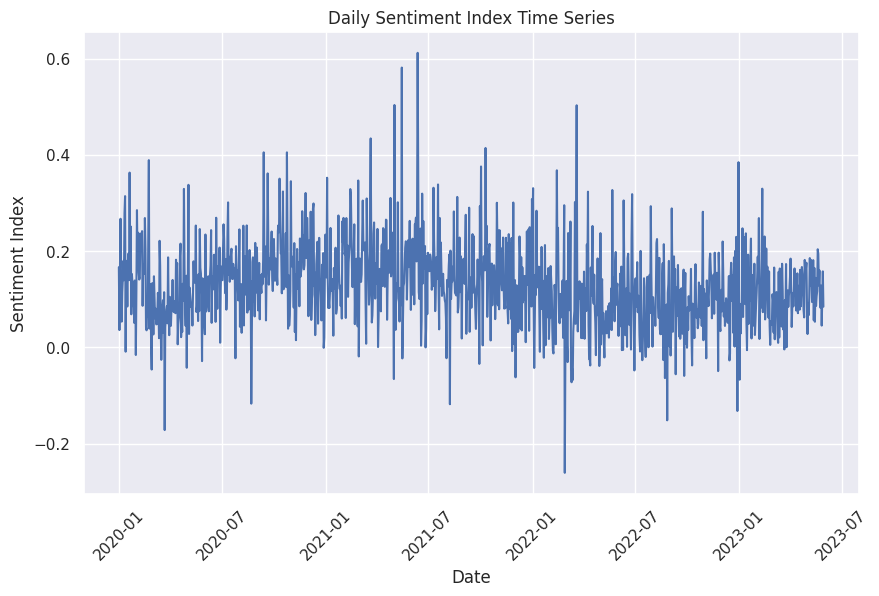

In [ ]:
plot_daily_sentiment_index(daily_sentiment_index)

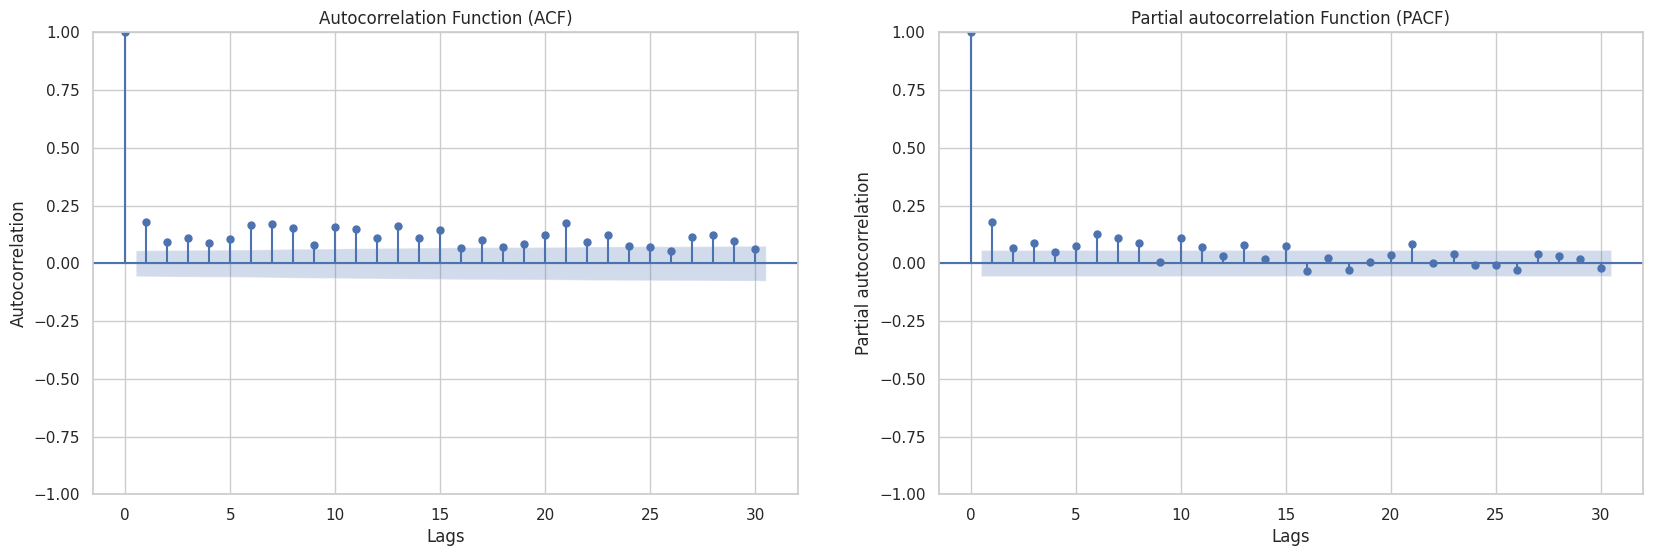

In [ ]:
plot_acf_pacf(daily_sentiment_index)

**Comment:** We observe that there seems to be a seasonal component to the autocorrelation. Indeed, these waves in the ACF and the PACF show that values that are lagged by 5, 10, 15, 20 have some information in explaining today's sentiment.

ADF Test

In [ ]:
adf_test(daily_sentiment_index['sentiment'])

ADF Statistic: -4.114329187113047
p-value: 0.0009170314034216941
Critical Values:
1%: -3.435699433298302
5%: -2.863902271843875
10%: -2.5680277086214076


- ADF Statistic: The ADF statistic is -4.114329187113111. The more negative the ADF statistic, the stronger the evidence against the null hypothesis of non-stationarity. In this case, the large negative value indicates strong evidence in favor of stationarity in the data.

- p-value: The p-value is a measure of the statistical significance of the ADF statistic. It represents the probability of observing a test statistic as extreme as the one calculated, assuming the null hypothesis of non-stationarity is true. In this case, the p-value is 0.0009170314034214717, which is smaller than any conventional significance level (such as 0.05 or 0.01). This indicates strong evidence to reject the null hypothesis of non-stationarity and suggests that the data is stationary.

- Critical Values: The critical values represent the threshold values that the ADF statistic needs to exceed in order to reject the null hypothesis. The ADF test calculates critical values at different confidence levels (1%, 5%, and 10%). In this case, all the critical values are negative. Since the ADF statistic (-4.114329187113111) is more negative than the critical values (-3.435699433298302, -2.863902271843875, -2.5680277086214076), we have strong evidence to reject the null hypothesis and conclude that the data is stationary.

In [ ]:
# Get AIC and BIC values for different values of p and q
aic_bic_dict = get_aic_bic_dict(daily_sentiment_index['sentiment'].values, 5, 2, 5)

/opt/anaconda3/envs/FE/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/opt/anaconda3/envs/FE/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/anaconda3/envs/FE/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/anaconda3/envs/FE/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/anaconda3/envs/FE/lib/py

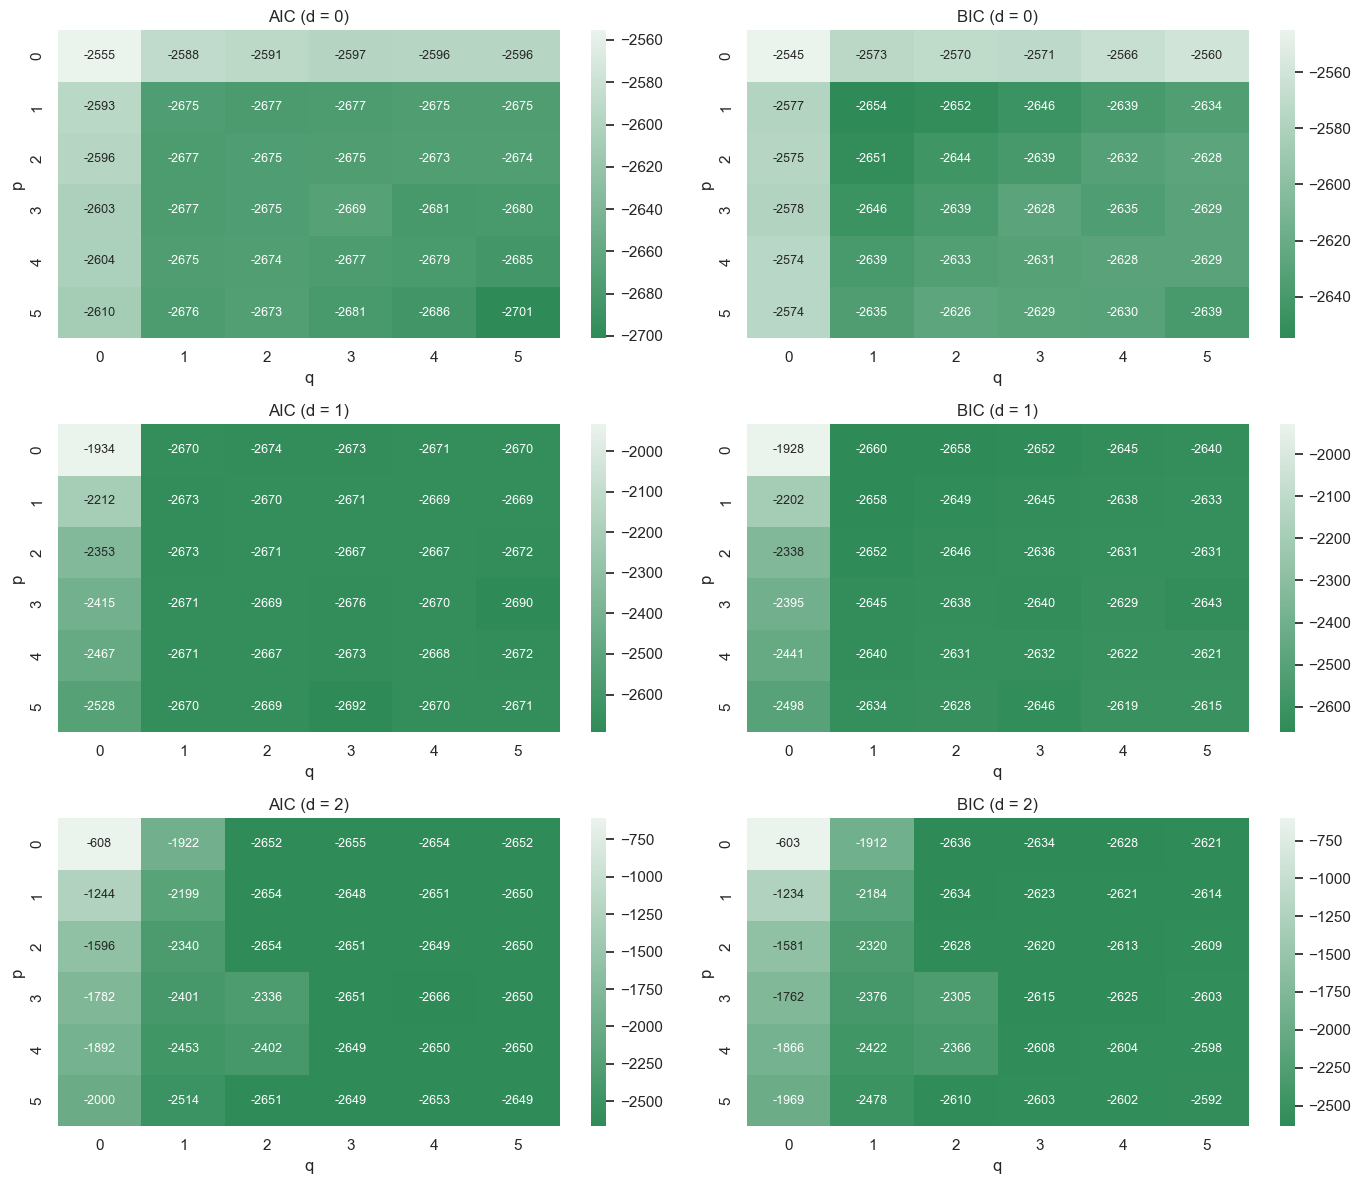

In [ ]:
# Display heatmap
plot_aic_bic_heatmap(aic_bic_dict)

**Comment:** The BIC and the AIC seem to propose two different optimal models: (5, 0, 5) for AIC and (1,0, 1) for BIC. We chose (5, 0, 5) as it performs well in both cases.

In [ ]:
# Fit best ARMA model
arima = ARIMA(daily_sentiment_index['sentiment'].values, order = (5, 0, 5))
arima_fit = arima.fit(method_kwargs={"maxiter": 500})
print(arima_fit.summary())

/opt/anaconda3/envs/FE/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1246
Model:                 ARIMA(5, 0, 5)   Log Likelihood                1362.551
Date:                Thu, 08 Jun 2023   AIC                          -2701.102
Time:                        19:01:02   BIC                          -2639.570
Sample:                             0   HQIC                         -2677.967
                               - 1246                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1293      0.026      4.914      0.000       0.078       0.181
ar.L1          0.4441      0.009     49.672      0.000       0.427       0.462
ar.L2          0.8248      0.011     75.588      0.0

In [ ]:
# Run the Ljung-Box test
acorr_ljungbox(arima_fit.resid)

lb_stat  lb_pvalue
1    1.698342   0.192505
2    1.845534   0.397418
3    2.174560   0.536977
4    2.469615   0.650085
5    2.499868   0.776515
6    3.113616   0.794458
7    5.288000   0.624862
8    5.475112   0.705796
9    6.118803   0.727972
10  12.874270   0.230787

The Ljung-Box test is a statistical test that is used to detect autocorrelation in a time series. In this test, the null hypothesis is that the data are independently distributed (i.e., the observations are not serially correlated).

The Ljung-Box statistic (lb_stat) and the corresponding p-value (lb_pvalue) are provided in your table. The p-value is the probability of observing a test statistic as extreme as the one calculated, given that the null hypothesis is true.

Generally, if the p-value is less than a certain significance level (usually 0.05), we reject the null hypothesis, indicating that there is evidence of serial correlation.


**Comment:** We observe that residuals are not serially correlated at any lag, which indicates that the model is not a bad one.

Fetching TSLA data to continue with the process of evaluation

In [ ]:
# Fetch the log returns for TSLA
returns = fetch_log_returns(['TSLA'], '2020-01-01')
returns = pd.concat(returns.values(), axis=1, keys=returns.keys())
returns = returns.reset_index()

In [ ]:
returns

Date     SP500      TSLA
0   2020-01-03 -0.007060  0.029633
1   2020-01-06  0.003533  0.019255
2   2020-01-07 -0.002803  0.038801
3   2020-01-08  0.004902  0.049205
4   2020-01-09  0.006655 -0.021945
..         ...       ...       ...
858 2023-06-01  0.009854  0.017604
859 2023-06-02  0.014534  0.031081
860 2023-06-05 -0.002004  0.017012
861 2023-06-06  0.002354  0.017003
862 2023-06-07 -0.003565  0.015838

[863 rows x 3 columns]

In [ ]:
sentiment_returns = sentiment_returns_df(daily_sentiment_index, returns)
sentiment_returns

Date  sentiment  num_tweets  num_words_per_tweet     SP500  \
0   2020-01-03   0.168826          43            12.279070 -0.007060   
1   2020-01-06   0.053533          27            18.000000  0.003533   
2   2020-01-07   0.115151          59            17.440678 -0.002803   
3   2020-01-08   0.141903          66            16.969697  0.004902   
4   2020-01-09   0.179772          50            15.060000  0.006655   
..         ...        ...         ...                  ...       ...   
852 2023-05-23   0.160014          51            19.333333 -0.011222   
853 2023-05-24   0.091855          65            14.200000 -0.007319   
854 2023-05-25   0.082173          89            17.292135  0.008758   
855 2023-05-26   0.128490          59            20.016949  0.013049   
856 2023-05-30   0.084627          45            20.866667  0.000017   

         TSLA  Average Return  
0    0.029633        0.029633  
1    0.019255        0.019255  
2    0.038801        0.038801  
3    0.049205        0.049205  
4   -0.021945       -0.021945  
..        ...             ...  
852 -0.016413       -0.016413  
853 -0.015449       -0.015449  
854  0.008584        0.008584  
855  0.047162        0.047162  
856  0.041363        0.041363  

[857 rows x 7 columns]

Plotting both the time series

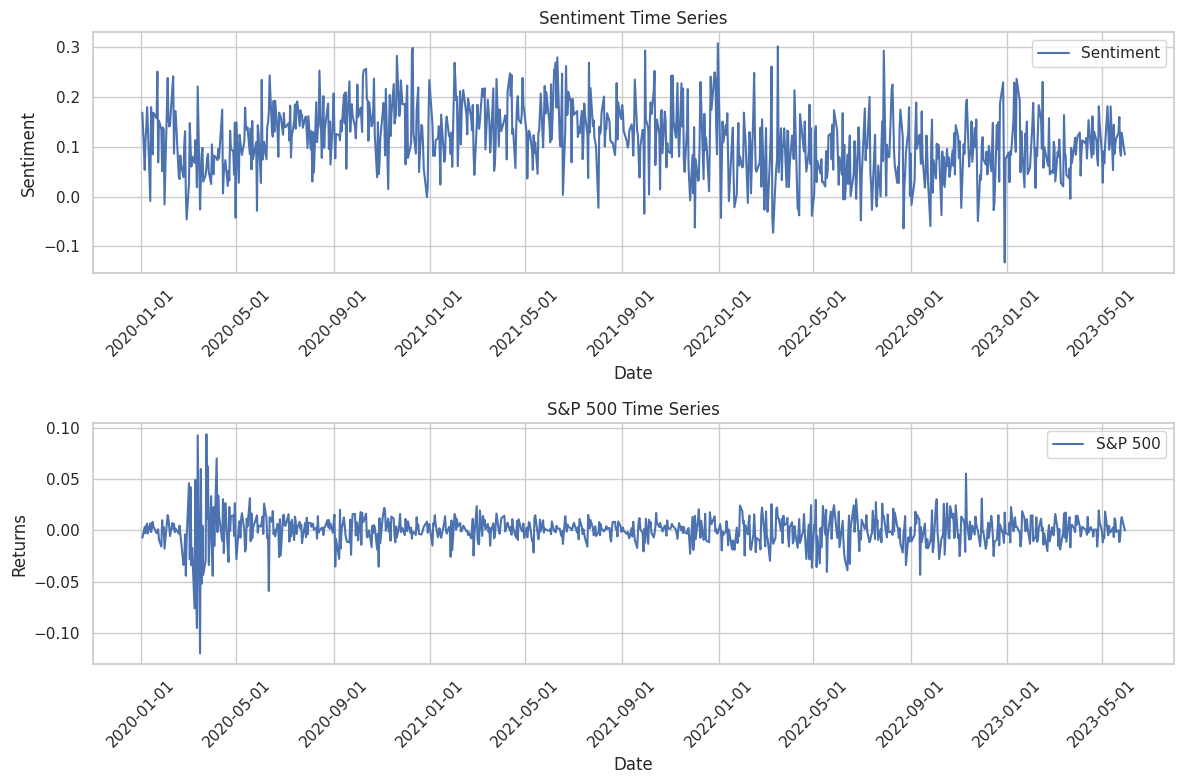

In [ ]:
plot_sentiment_sp500(sentiment_returns)

In [ ]:
granger_causality_test_sp500(sentiment_returns)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.7701  , p=0.0525  , df_denom=853, df_num=1
ssr based chi2 test:   chi2=3.7833  , p=0.0518  , df=1
likelihood ratio test: chi2=3.7750  , p=0.0520  , df=1
parameter F test:         F=3.7701  , p=0.0525  , df_denom=853, df_num=1
Lag: 1
Granger Causality Test p-value: 0.051765348819591855



The Granger causality test with a lag of 1 suggests weak evidence to support a causal relationship between the sentiment time series and the log returns of the S&P 500 index. The p-value of 0.0518 is slightly larger than the conventional significance level of 0.05, indicating that the null hypothesis of no Granger causality cannot be firmly rejected at the standard significance level.

In conclusion, based on the results of the Granger causality test, there is insufficient evidence to conclude that the changes in sentiment, as captured by the sentiment time series, Granger-cause changes in the log returns of the S&P 500 index. Therefore, we do not have strong statistical evidence to support the hypothesis that the sentiment significantly influences the next-day log returns of the S&P 500 index.


### 2. Elon Musk (@elonmusk):

Stock:
- Tesla, Inc. (TSLA)

Justification for Stock Selection:
- Elon Musk is the CEO of Tesla, Inc., and his tweets have a significant impact on Tesla's stock price and overall market sentiment. As his own company, Tesla, Inc. is directly influenced by his actions and statements, it is a relevant stock to consider.

Cutoff Date: January 1, 2020

Justification for Cutoff Date:
- Selecting a cutoff date of January 1, 2020, allows for the inclusion of significant events like the COVID-19 pandemic and subsequent market recovery. This timeframe enables the analysis of the impact of Elon Musk's tweets on Tesla's stock performance during these market-changing events.

Loading the tweets dataset

In [21]:
#musk = pd.read_csv('/content/drive/MyDrive/FInancial Econ/Tweets/tweet_elonmusk.csv')
musk = pd.read_csv('/content/drive/MyDrive/FInancial Econ HW2/Tweets/tweet_elonmusk.csv')

In [22]:
musk.head()

Date  username  \
0  2023-05-29 22:22:12+00:00  elonmusk   
1  2023-05-29 22:21:43+00:00  elonmusk   
2  2023-05-29 21:33:29+00:00  elonmusk   
3  2023-05-29 20:04:12+00:00  elonmusk   
4  2023-05-29 19:44:54+00:00  elonmusk   

                                               tweet  num_of_likes  \
0              @mattyglesias Now answer the question          9003   
1               @mattyglesias Insufferable numbskull         49127   
2                                   @EndWokeness Yes         34704   
3                                      @SethDillon 🤣          5161   
4  @TeslaOwnersEBay @stevenmarkryan @WholeMarsBlo...          1590   

   num_of_retweet  
0             333  
1            1873  
2            1797  
3             210  
4              90

Preprocess the tweets

In [23]:
musk_prep = preprocess_tweets(musk)

Plotting the count of tweets


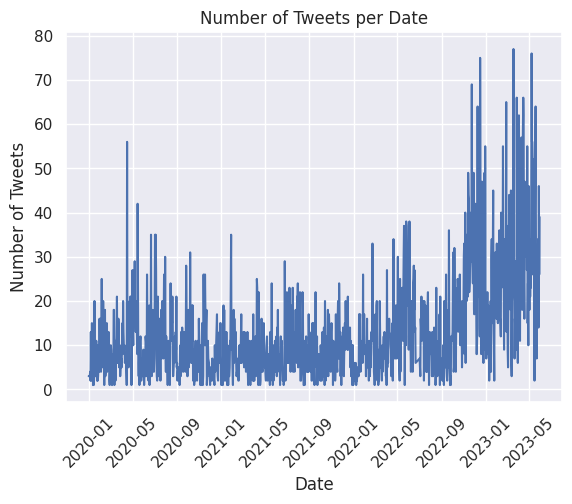

In [24]:
plot_count_of_tweets(musk_prep)

In [25]:
daily_sentiment_index = calculate_sentiment_index(musk_prep)
daily_sentiment_index

Date  sentiment  num_tweets  num_words_per_tweet
0     2020-01-01   0.157333           3             6.333333
1     2020-01-04   0.502533           3            11.000000
2     2020-01-05   0.227550           4             1.750000
3     2020-01-06   0.000000           2             5.000000
4     2020-01-07   0.145208          13             8.846154
...          ...        ...         ...                  ...
1175  2023-05-25   0.102635          34             5.941176
1176  2023-05-26   0.067636          14             6.642857
1177  2023-05-27   0.040274          46             4.239130
1178  2023-05-28   0.030765          26             3.576923
1179  2023-05-29   0.147805          39             5.948718

[1180 rows x 4 columns]

Descriptive Statistics

In [26]:
daily_sentiment_index['sentiment'].describe()

count    1180.000000
mean        0.162519
std         0.153121
min        -0.765000
25%         0.072794
50%         0.151041
75%         0.237157
max         0.912600
Name: sentiment, dtype: float64

Daily Sentiment Index

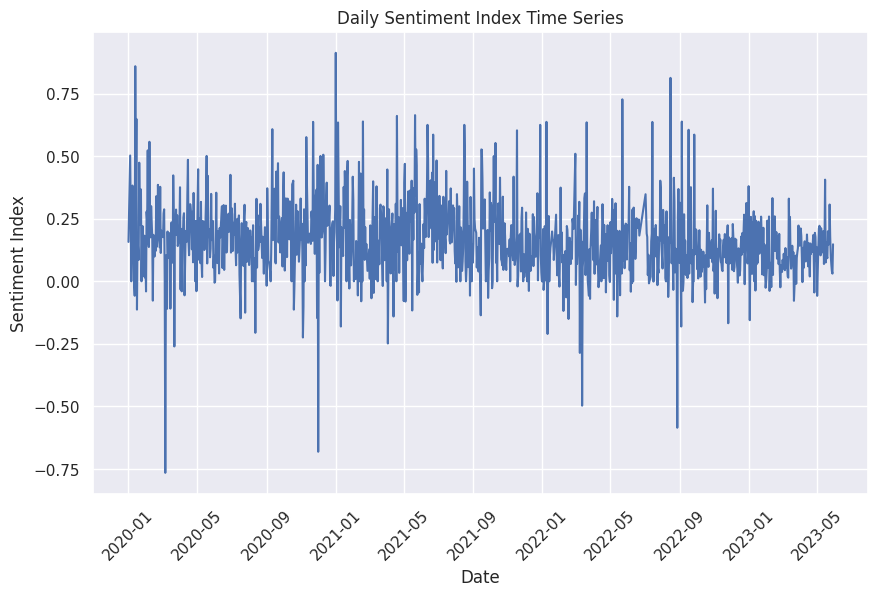

In [27]:
plot_daily_sentiment_index(daily_sentiment_index)

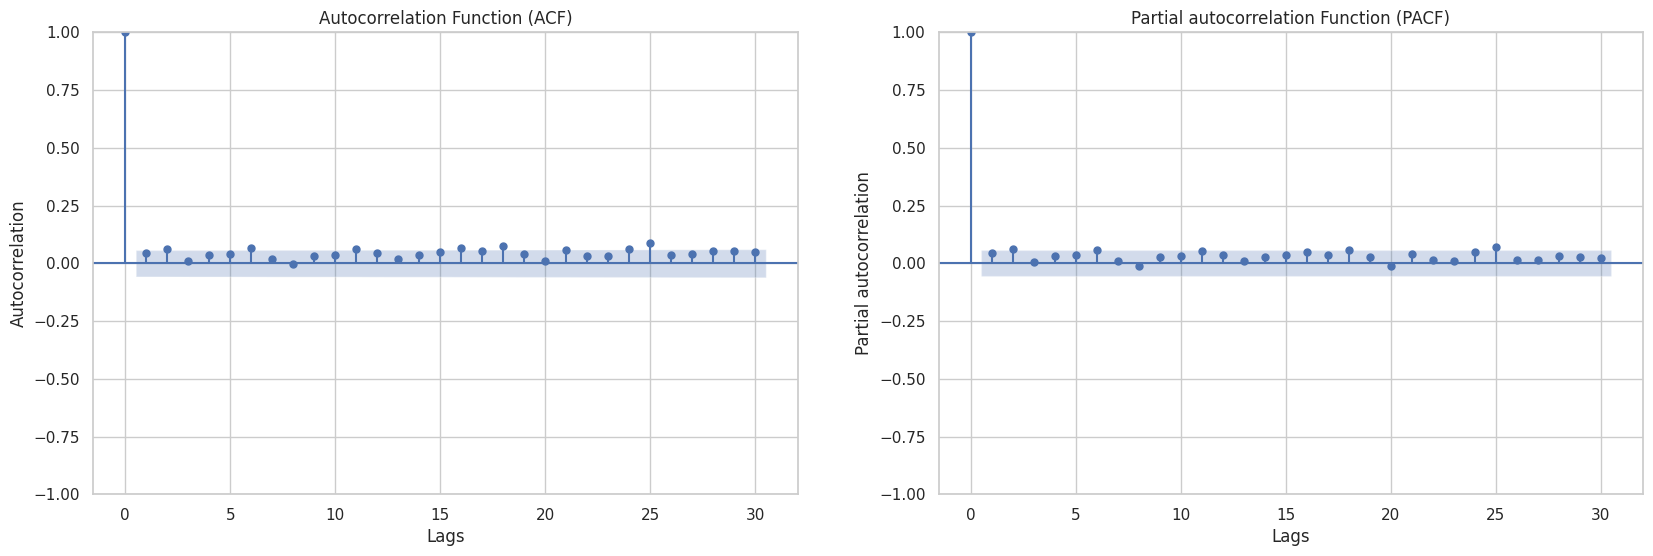

In [28]:
plot_acf_pacf(daily_sentiment_index)

ADF Test

In [29]:
adf_test(daily_sentiment_index['sentiment'])

ADF Statistic: -22.344248741333683
p-value: 0.0
Critical Values:
1%: -3.435913333460925
5%: -2.863996640985854
10%: -2.5680779665111078


- ADF Statistic: The ADF statistic is -22.344248741333683. The more negative the ADF statistic, the stronger the evidence against the null hypothesis of non-stationarity. In this case, the large negative value indicates strong evidence in favor of stationarity in the 'sentiment' data.

- p-value: The p-value is a measure of the statistical significance of the ADF statistic. It represents the probability of observing a test statistic as extreme as the one calculated, assuming the null hypothesis of non-stationarity is true. In this case, the p-value is 0.0, which is smaller than any conventional significance level (such as 0.05 or 0.01). This indicates strong evidence to reject the null hypothesis of non-stationarity and suggests that the 'sentiment' data is stationary.

- Critical Values: The critical values represent the threshold values that the ADF statistic needs to exceed in order to reject the null hypothesis. The ADF test calculates critical values at different confidence levels (1%, 5%, and 10%). In this case, all the critical values are negative. Since the ADF statistic (-22.344248741333683) is more negative than the critical values (-3.435913333460925, -2.863996640985854, -2.5680779665111078), we have strong evidence to reject the null hypothesis and conclude that the 'sentiment' data is stationary.

In [30]:
# Get AIC and BIC values for different values of p and q
aic_bic_dict = get_aic_bic_dict(daily_sentiment_index['sentiment'].values, 5, 2, 5)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


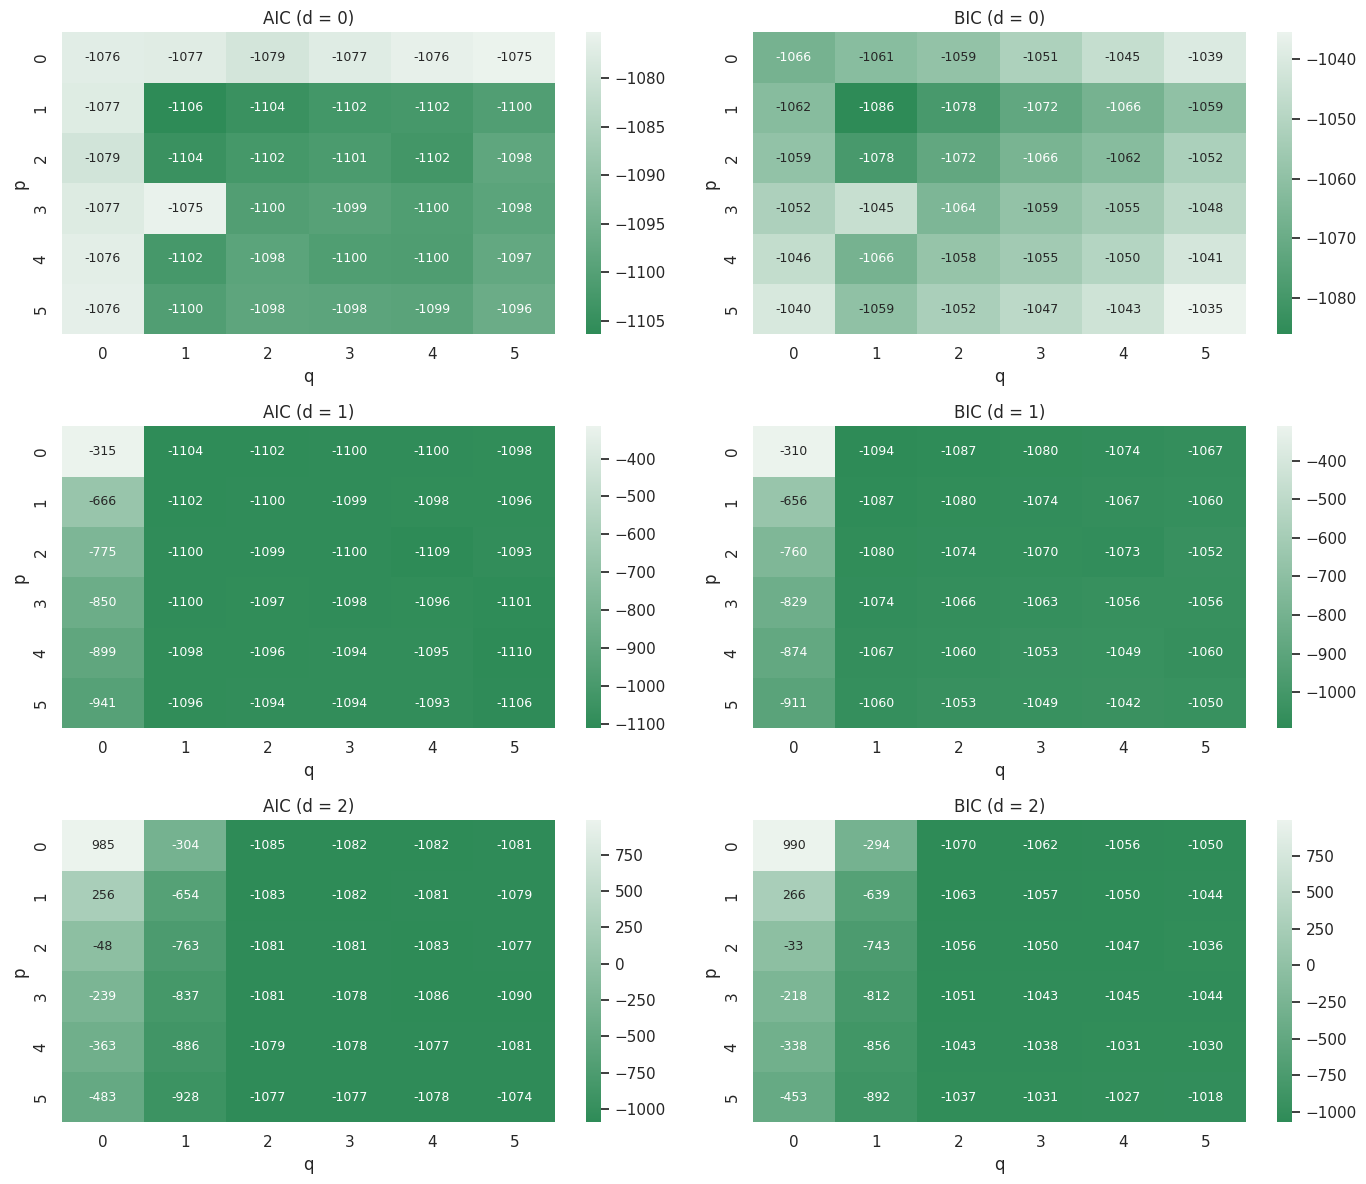

In [31]:
# Display heatmap
plot_aic_bic_heatmap(aic_bic_dict)

**Comment** Here we chose (1,0,1) model

In [32]:
# Fit best ARMA model
arima = ARIMA(daily_sentiment_index['sentiment'].values, order = (1, 0, 1))
arima_fit = arima.fit(method_kwargs={"maxiter": 500})
print(arima_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1180
Model:                 ARIMA(1, 0, 1)   Log Likelihood                 557.177
Date:                Thu, 08 Jun 2023   AIC                          -1106.353
Time:                        19:37:07   BIC                          -1086.060
Sample:                             0   HQIC                         -1098.703
                               - 1180                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1619      0.019      8.582      0.000       0.125       0.199
ar.L1          0.9948      0.006    172.145      0.000       0.983       1.006
ma.L1         -0.9774      0.011    -87.851      0.0

In [33]:
# Run the Ljung-Box test
acorr_ljungbox(arima_fit.resid)

lb_stat  lb_pvalue
1   0.000507   0.982043
2   0.364236   0.833503
3   2.016039   0.569085
4   2.139542   0.710112
5   2.150908   0.827895
6   2.739343   0.840778
7   3.524604   0.832613
8   6.163071   0.628971
9   6.318369   0.707680
10  6.356772   0.784451

**Comment**  Based on the result, we can say that the chosen values of **p** and **q**  are accurate enough.

Fetching stock data to continue with the process of evaluation

In [ ]:
# Fetch the log returns for TSLA
returns = fetch_log_returns(['TSLA'], '2020-01-01')
returns = pd.concat(returns.values(), axis=1, keys=returns.keys())
returns = returns.reset_index()

In [ ]:
returns

Date     SP500      TSLA
0   2020-01-03 -0.007060  0.029633
1   2020-01-06  0.003533  0.019255
2   2020-01-07 -0.002803  0.038801
3   2020-01-08  0.004902  0.049205
4   2020-01-09  0.006655 -0.021945
..         ...       ...       ...
858 2023-06-01  0.009854  0.017604
859 2023-06-02  0.014534  0.031081
860 2023-06-05 -0.002004  0.017012
861 2023-06-06  0.002354  0.017003
862 2023-06-07 -0.003812  0.014731

[863 rows x 3 columns]

In [ ]:
sentiment_returns = sentiment_returns_df(daily_sentiment_index, returns)
sentiment_returns

Date  sentiment  num_tweets  num_words_per_tweet     SP500  \
0   2020-01-06   0.000000           2             5.000000  0.003533   
1   2020-01-07   0.145208          13             8.846154 -0.002803   
2   2020-01-08   0.382500           2             7.000000  0.004902   
3   2020-01-09   0.229400           2             4.500000  0.006655   
4   2020-01-10   0.152187          15            11.000000 -0.002855   
..         ...        ...         ...                  ...       ...   
814 2023-05-22   0.148900          16             1.875000  0.000155   
815 2023-05-23   0.306686          21             9.285714 -0.011222   
816 2023-05-24   0.179953          30             3.833333 -0.007319   
817 2023-05-25   0.102635          34             5.941176  0.008758   
818 2023-05-26   0.067636          14             6.642857  0.013049   

         TSLA  Average Return  
0    0.019255        0.019255  
1    0.038801        0.038801  
2    0.049205        0.049205  
3   -0.021945       -0.021945  
4   -0.006627       -0.006627  
..        ...             ...  
814  0.048462        0.048462  
815 -0.016413       -0.016413  
816 -0.015449       -0.015449  
817  0.008584        0.008584  
818  0.047162        0.047162  

[819 rows x 7 columns]

Plotting both the time series

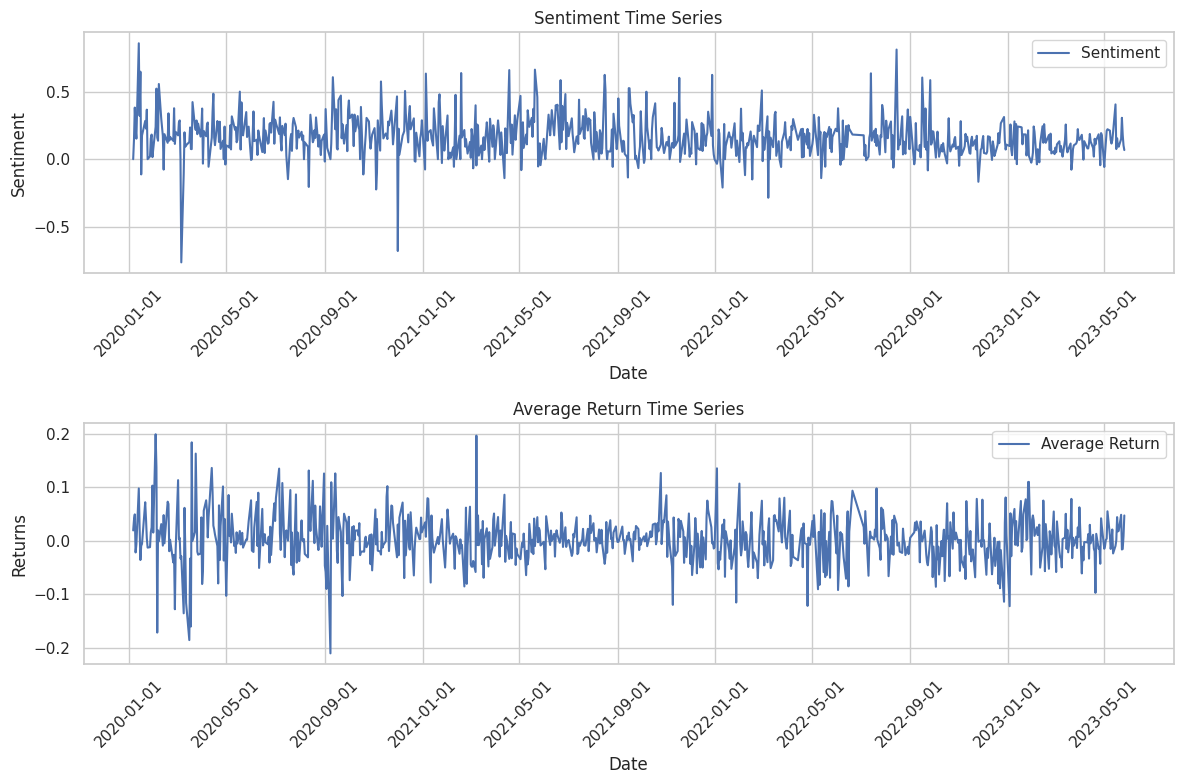

In [ ]:
plot_sentiment_portfolio(sentiment_returns)

In [ ]:
granger_causality_test_portfolio(sentiment_returns)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.7885  , p=0.0519  , df_denom=815, df_num=1
ssr based chi2 test:   chi2=3.8025  , p=0.0512  , df=1
likelihood ratio test: chi2=3.7937  , p=0.0514  , df=1
parameter F test:         F=3.7885  , p=0.0519  , df_denom=815, df_num=1
Lag: 1
Granger Causality Test p-value: 0.051176901472582415



The Granger causality test with a lag of 1 indicates that there is weak evidence to suggest a causal relationship between sentiment and log returns. The p-value of 0.0512 exceeds the conventional significance level of 0.05, suggesting that the null hypothesis of no Granger causality cannot be rejected at a standard significance level.

In conclusion, based on the results of the Granger causality test, there is insufficient evidence to conclude that changes in sentiment, as captured by Elon Musk's tweets, Granger-cause changes in log returns of TSLA stocks. Therefore, we do not have strong statistical evidence to support the hypothesis that Elon Musk's tweets significantly influence the next-day log returns of TSLA stocks.

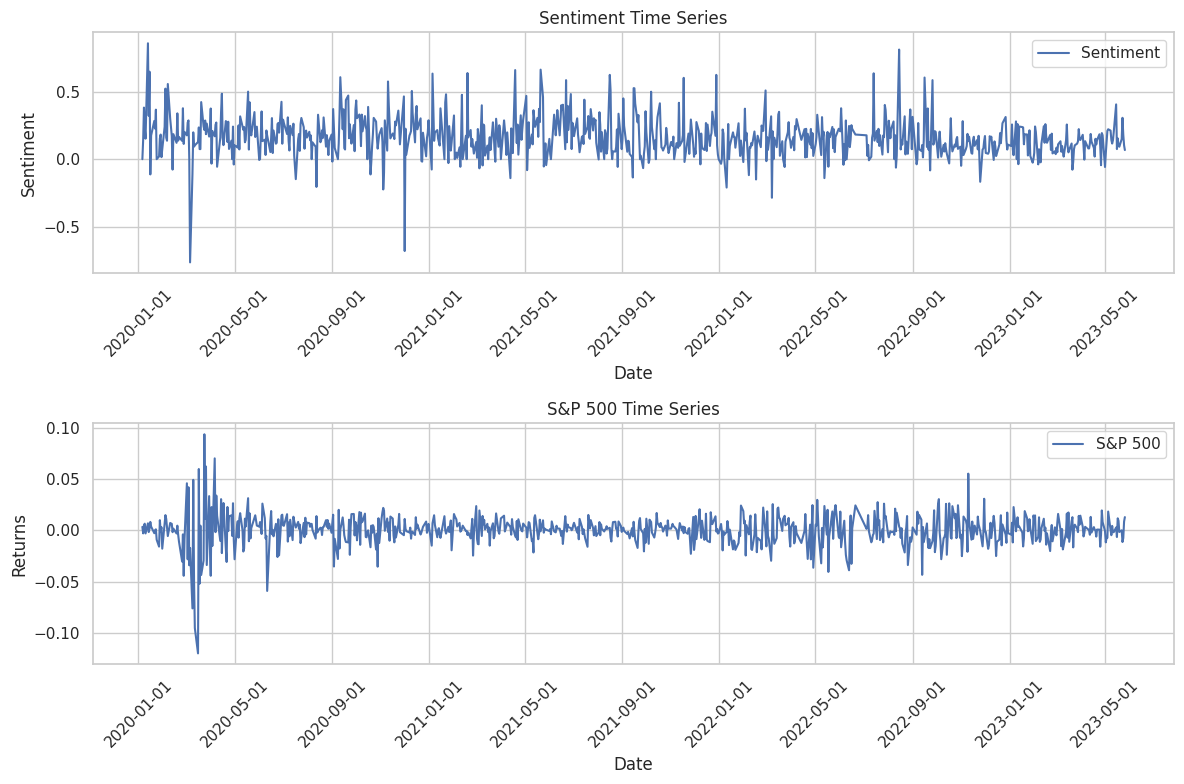

In [ ]:
plot_sentiment_sp500(sentiment_returns)

In [ ]:
granger_causality_test_sp500(sentiment_returns)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.1062  , p=0.1471  , df_denom=815, df_num=1
ssr based chi2 test:   chi2=2.1140  , p=0.1460  , df=1
likelihood ratio test: chi2=2.1113  , p=0.1462  , df=1
parameter F test:         F=2.1062  , p=0.1471  , df_denom=815, df_num=1
Lag: 1
Granger Causality Test p-value: 0.1459590107731813


The Granger causality test results for Musk's tweets vs. S&P 500 returns suggest that there is weak evidence to support a causal relationship between the two variables.

The p-value of 0.1459 indicates that there is no significant evidence to reject the null hypothesis of no Granger causality. This suggests that changes in Musk's tweets do not significantly cause changes in S&P 500 returns at a standard significance level (e.g., 0.05).

Therefore, based on the Granger causality test results, we do not have strong statistical evidence to support the hypothesis that Musk's tweets have a significant causal impact on S&P 500 returns.

### 3. Chamath Palihapitiya (@chamath)

Stocks:

- Virgin Galactic Holdings, Inc. (SPCE)
- Clover Health Investments Corp. (CLOV)
- SoFi Technologies Inc. (SOFI)
- Palantir Technologies Inc. (PLTR)
- OpenDoor Technologies Inc. (OPEN)

Justification for Stock Selection:

- Chamath Palihapitiya is known for his involvement in special purpose acquisition companies (SPACs) and investments in disruptive technologies. The selected stocks are associated with companies that Chamath Palihapitiya has mentioned or invested in, making them relevant to his investment focus.

Cutoff Date: January 1, 2020

Justification for Cutoff Date:

- Setting the cutoff date to January 1, 2020, aligns with significant market events and the rise of SPACs and disruptive technology stocks. This timeframe enables the analysis of the impact of Chamath Palihapitiya's tweets on these stocks during the surge of interest in SPACs and disruptive technologies.


Loading the tweets dataset

In [ ]:
chamath = pd.read_csv('/content/drive/MyDrive/FInancial Econ/Tweets/tweet_chamath.csv')

In [ ]:
chamath.head()

Date username  \
0  2023-05-30 22:40:05+00:00  chamath   
1  2023-05-29 23:20:32+00:00  chamath   
2  2023-05-27 01:14:46+00:00  chamath   
3  2023-05-27 01:10:08+00:00  chamath   
4  2023-05-24 20:19:50+00:00  chamath   

                                               tweet  num_of_likes  \
0  Exactly a decade ago, on May 30, 2013 I wrote ...          1739   
1                            @Jason @zaferyounis 80%           154   
2     What I read this week… https://t.co/YY3V3Q449Z            83   
3                              Memorial weekend pod!           184   
4  So much has changed in the 9 months since Sep ...           406   

   num_of_retweet  
0             153  
1               0  
2               4  
3              19  
4              42

Preprocess the tweets

In [ ]:
chamath_prep = preprocess_tweets(chamath)

Plotting the count of tweets


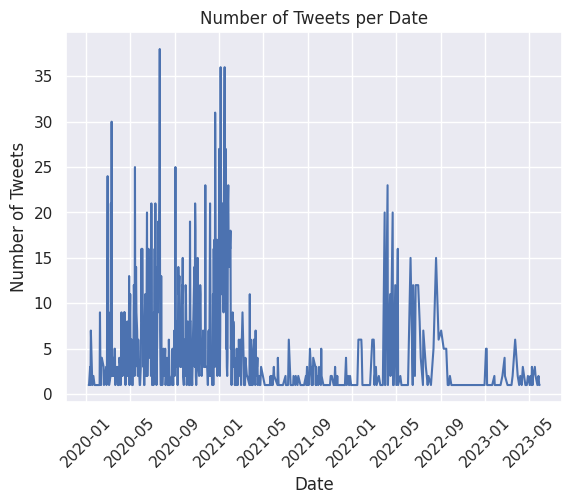

In [ ]:
plot_count_of_tweets(chamath_prep)

In [ ]:
daily_sentiment_index = calculate_sentiment_index(chamath_prep)
daily_sentiment_index

Date  sentiment  num_tweets  num_words_per_tweet
0    2020-01-09   0.000000           1             0.000000
1    2020-01-10   0.000000           1             1.000000
2    2020-01-13   0.161567           3             9.333333
3    2020-01-14   0.440400           1             2.000000
4    2020-01-15   0.469657           7            25.000000
..          ...        ...         ...                  ...
571  2023-05-19   0.000000           2             3.000000
572  2023-05-24  -0.631000           1           143.000000
573  2023-05-27   0.000000           2             4.000000
574  2023-05-29   0.000000           1             0.000000
575  2023-05-30  -0.153100           1            41.000000

[576 rows x 4 columns]

Descriptive Statistics

In [ ]:
daily_sentiment_index['sentiment'].describe()

count    576.000000
mean       0.127139
std        0.269669
min       -0.825900
25%        0.000000
50%        0.068305
75%        0.278897
max        0.928700
Name: sentiment, dtype: float64

Daily Sentiment Index

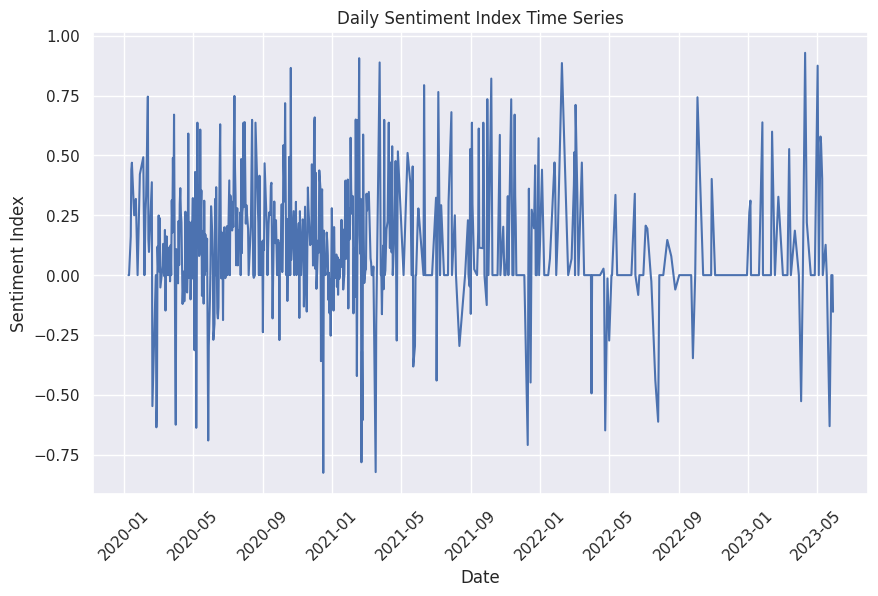

In [ ]:
plot_daily_sentiment_index(daily_sentiment_index)

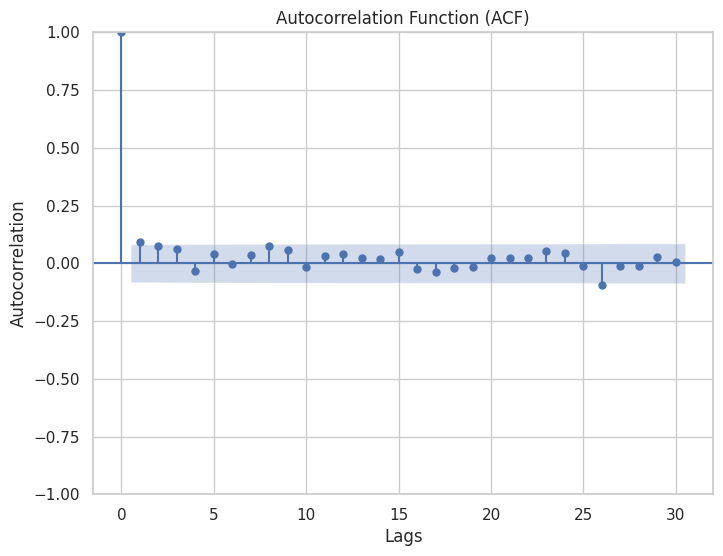

In [ ]:
plot_acf_pacf(daily_sentiment_index)

ADF Test

In [ ]:
adf_test(daily_sentiment_index['sentiment'])

ADF Statistic: -15.047594236004853
p-value: 9.395022930602213e-28
Critical Values:
1%: -3.4417938762914972
5%: -2.866588428280353
10%: -2.5694586650317475


- ADF Statistic: The ADF statistic is -15.047594236004853. The more negative the ADF statistic, the stronger the evidence against the null hypothesis of non-stationarity. In this case, the large negative value indicates strong evidence in favor of stationarity in the 'sentiment' data.

- p-value: The p-value is a measure of the statistical significance of the ADF statistic. It represents the probability of observing a test statistic as extreme as the one calculated, assuming the null hypothesis of non-stationarity is true. In this case, the p-value is 9.395022930602213e-28, which is extremely small. This indicates strong evidence to reject the null hypothesis of non-stationarity and suggests that the 'sentiment' data is stationary.

- Critical Values: The critical values represent the threshold values that the ADF statistic needs to exceed in order to reject the null hypothesis. The ADF test calculates critical values at different confidence levels (1%, 5%, and 10%). In this case, all the critical values are negative. Since the ADF statistic (-15.047594236004853) is more negative than the critical values (-3.4417938762914972, -2.866588428280353, -2.5694586650317475), we have strong evidence to reject the null hypothesis and conclude that the 'sentiment' data is stationary.

In [ ]:
# Get AIC and BIC values for different values of p and q
aic_bic_dict = get_aic_bic_dict(daily_sentiment_index['sentiment'].values, 5, 2, 5)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


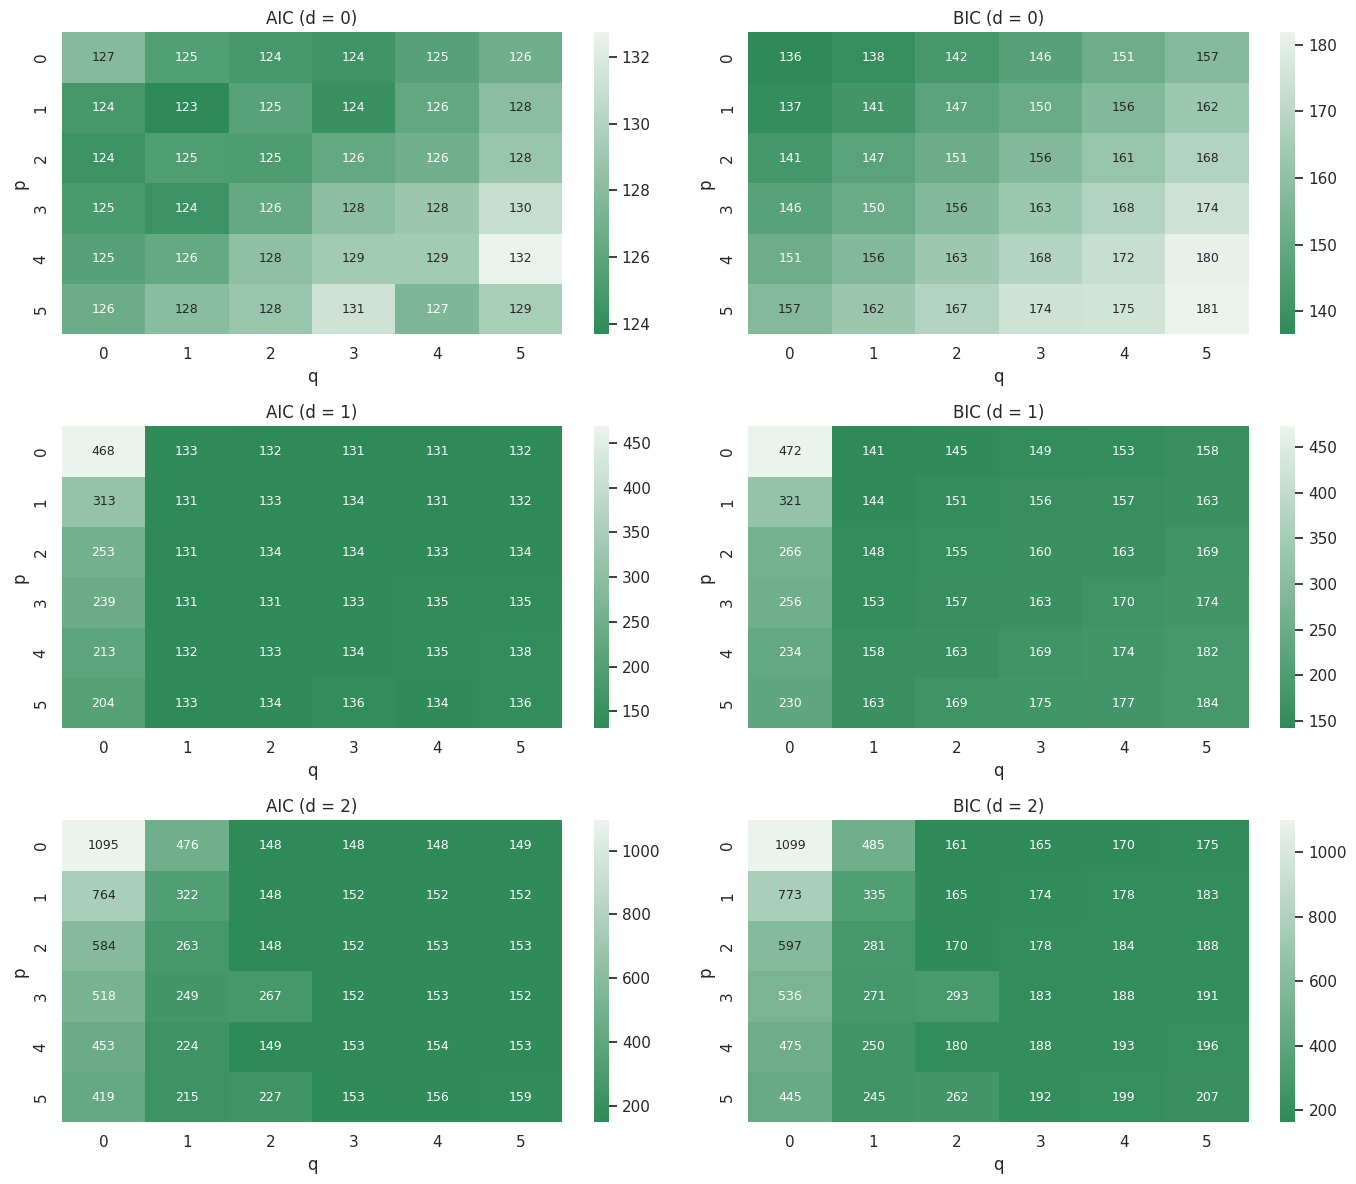

In [ ]:
# Display heatmap
plot_aic_bic_heatmap(aic_bic_dict)

**Comment**  Here we get the lowest AIC / BIC value for (1,0,1) model.

In [ ]:
# Fit best ARMA model
arima = ARIMA(daily_sentiment_index['sentiment'].values, order = (1, 0, 1))
arima_fit = arima.fit(method_kwargs={"maxiter": 500})
print(arima_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  576
Model:                 ARIMA(1, 0, 1)   Log Likelihood                 -57.841
Date:                Thu, 08 Jun 2023   AIC                            123.682
Time:                        20:16:57   BIC                            141.106
Sample:                             0   HQIC                           130.477
                                - 576                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1268      0.016      7.884      0.000       0.095       0.158
ar.L1          0.8018      0.153      5.250      0.000       0.502       1.101
ma.L1         -0.7302      0.170     -4.294      0.0

In [ ]:
# Run the Ljung-Box test
acorr_ljungbox(arima_fit.resid)

lb_stat  lb_pvalue
1   0.090766   0.763206
2   0.151575   0.927013
3   0.213621   0.975361
4   4.034938   0.401298
5   4.083537   0.537452
6   4.820608   0.567019
7   4.919709   0.669761
8   6.773924   0.561210
9   7.845435   0.549795
10  8.581680   0.572209

**Comment** Based on the Ljungbox test, we can say that our assumption of parameters are accurate enough

Fetching stock data to continue with the process of evaluation

In [ ]:
# Fetch the log returns for stocks
returns = fetch_log_returns(['SPCE', 'CLOV', 'SOFI', 'PLTR', 'OPEN'], '2020-01-01')
returns = pd.concat(returns.values(), axis=1, keys=returns.keys())
returns = returns.reset_index()

In [ ]:
returns = returns.fillna(0)

In [ ]:
sentiment_returns = sentiment_returns_df(daily_sentiment_index, returns)
sentiment_returns

Date  sentiment  num_tweets  num_words_per_tweet     SP500  \
0   2020-01-09   0.000000           1             0.000000  0.006655   
1   2020-01-10   0.000000           1             1.000000 -0.002855   
2   2020-01-13   0.161567           3             9.333333  0.006976   
3   2020-01-14   0.440400           1             2.000000 -0.001515   
4   2020-01-15   0.469657           7            25.000000  0.001870   
..         ...        ...         ...                  ...       ...   
420 2023-05-12   0.000000           2             3.000000 -0.001583   
421 2023-05-17   0.126700           3            68.333333  0.011891   
422 2023-05-19   0.000000           2             3.000000 -0.001446   
423 2023-05-24  -0.631000           1           143.000000 -0.007319   
424 2023-05-30  -0.153100           1            41.000000  0.000017   

         SPCE      CLOV      SOFI      PLTR      OPEN  Average Return  
0    0.054291  0.000000  0.000000  0.000000  0.000000        0.010858  
1    0.065615  0.000000  0.000000  0.000000  0.000000        0.013123  
2    0.067810  0.000000  0.000000  0.000000  0.000000        0.013562  
3    0.019708  0.000000  0.000000  0.000000  0.000000        0.003942  
4    0.062276  0.000000  0.000000  0.000000  0.000000        0.012455  
..        ...       ...       ...       ...       ...             ...  
420 -0.012315  0.026316 -0.023346 -0.038462 -0.071429       -0.023847  
421  0.068884  0.049505  0.042017  0.082365  0.162562        0.081066  
422 -0.028953 -0.037736 -0.027613 -0.002555 -0.004132       -0.020198  
423 -0.105477 -0.015842  0.003781 -0.032437  0.041322       -0.021730  
424  0.032544 -0.091675  0.114603  0.077656  0.042373        0.035100  

[425 rows x 11 columns]

Plotting both the time series

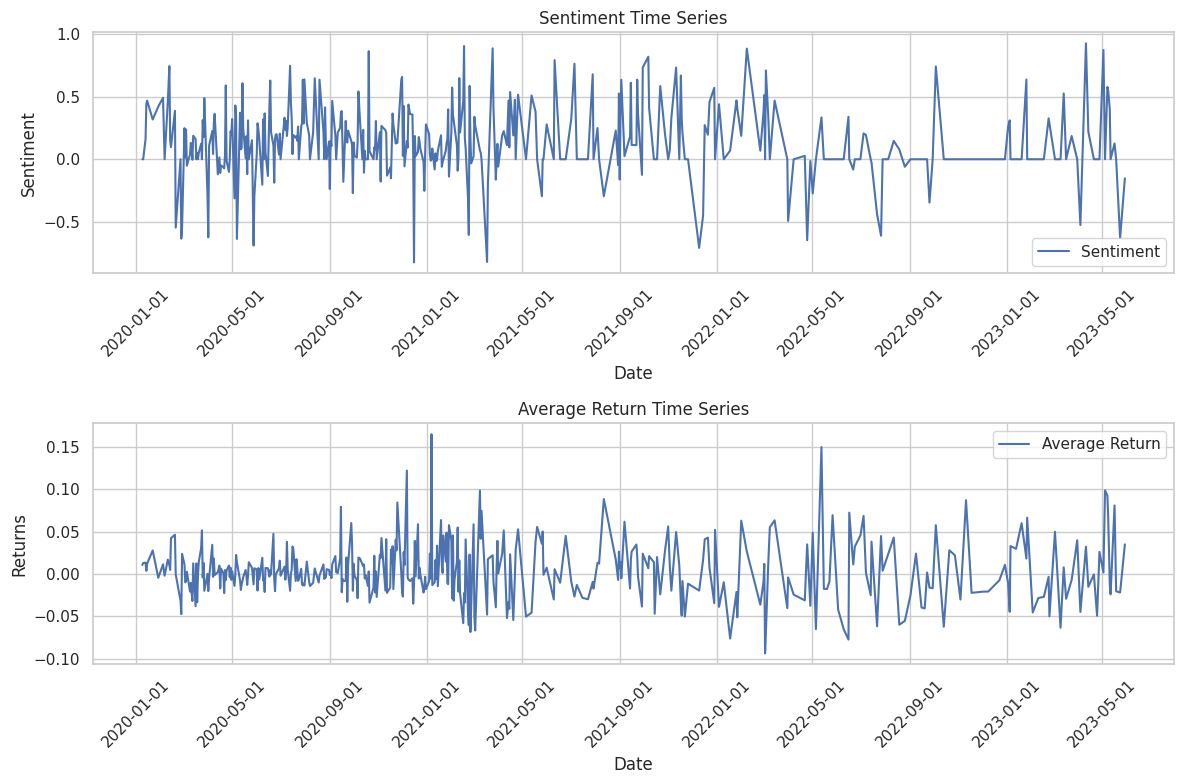

In [ ]:
plot_sentiment_portfolio(sentiment_returns)

In [ ]:
granger_causality_test_portfolio(sentiment_returns)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2861  , p=0.5930  , df_denom=421, df_num=1
ssr based chi2 test:   chi2=0.2881  , p=0.5914  , df=1
likelihood ratio test: chi2=0.2880  , p=0.5915  , df=1
parameter F test:         F=0.2861  , p=0.5930  , df_denom=421, df_num=1
Lag: 1
Granger Causality Test p-value: 0.5914139010530638



The Granger causality test results for Chamath vs. his portfolio suggest that there is no significant evidence to support a causal relationship between the two variables.

The p-value of 0.5914 indicates that there is no significant evidence to reject the null hypothesis of no Granger causality. This suggests that changes in Chamath's tweets do not significantly cause changes in his portfolio returns at a standard significance level (e.g., 0.05).

Therefore, based on the Granger causality test results, we do not have strong statistical evidence to support the hypothesis that Chamath's tweets have a significant causal impact on his portfolio returns.

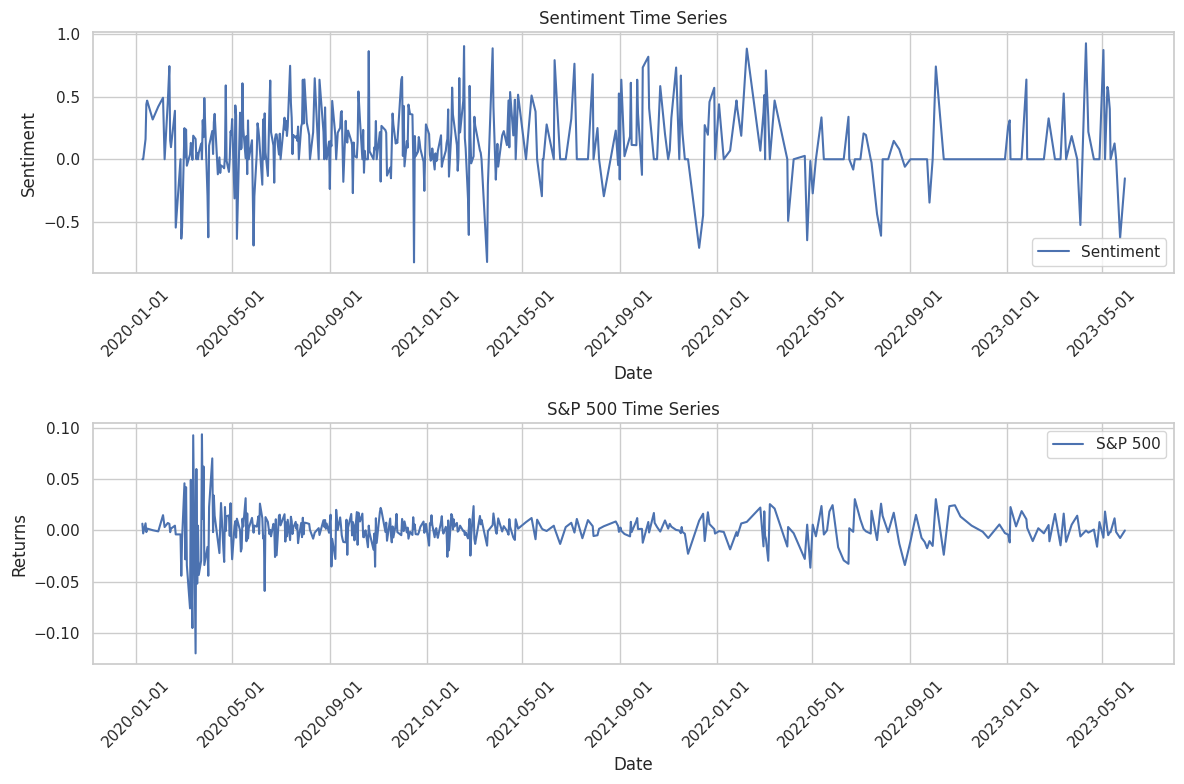

In [ ]:
plot_sentiment_sp500(sentiment_returns)

In [ ]:
granger_causality_test_sp500(sentiment_returns)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.7609  , p=0.1852  , df_denom=421, df_num=1
ssr based chi2 test:   chi2=1.7735  , p=0.1830  , df=1
likelihood ratio test: chi2=1.7698  , p=0.1834  , df=1
parameter F test:         F=1.7609  , p=0.1852  , df_denom=421, df_num=1
Lag: 1
Granger Causality Test p-value: 0.18295426467535772


### 4. Mark Cuban (@mcuban)

Stocks:

- Amazon.com, Inc. (AMZN)
- Netflix, Inc. (NFLX)
- Uber Technologies, Inc. (UBER)
- DraftKings Inc. (DKNG)
- Deere & Company (DE)

Justification for Stock Selection:

- Mark Cuban has a diverse investment portfolio and often shares insights and opinions on various stocks, including technology giants like Amazon (AMZN) and Netflix (NFLX), as well as emerging sectors like ride-hailing with Uber (UBER) and sports betting with DraftKings (DKNG).

Cutoff Date: January 1, 2020

Justification for Cutoff Date:

- Selecting a cutoff date of January 1, 2020, allows for capturing significant market events and developments related to the stocks mentioned by Mark Cuban. This timeframe enables the analysis of the impact of Mark Cuban's tweets on these stocks during important market phases.

Loading the tweets dataset

In [ ]:
cuban = pd.read_csv('/content/drive/MyDrive/FInancial Econ/Tweets/tweet_mcuban.csv')

In [ ]:
cuban.shape

(3459, 5)

Preprocess the tweets

In [ ]:
cuban_prep = preprocess_tweets(cuban)

Plotting the count of tweets


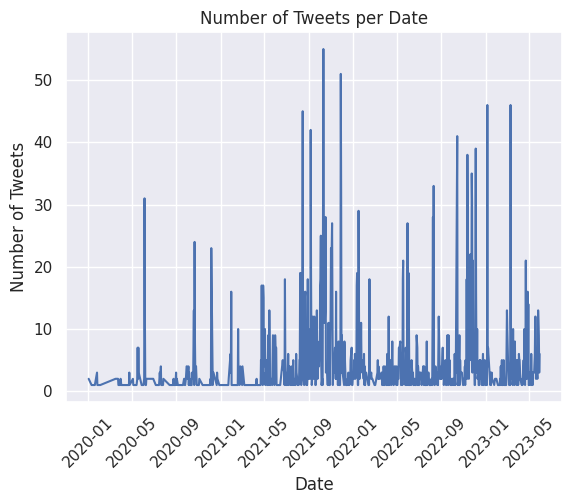

In [ ]:
plot_count_of_tweets(cuban_prep)

In [ ]:
daily_sentiment_index = calculate_sentiment_index(cuban_prep)
daily_sentiment_index

Date  sentiment  num_tweets  num_words_per_tweet
0    2020-01-03   0.048550           2            19.000000
1    2020-01-11   0.000000           1             3.000000
2    2020-01-20   0.000000           1             3.000000
3    2020-01-26   0.584200           3            30.333333
4    2020-01-27   0.840200           1            32.000000
..          ...        ...         ...                  ...
726  2023-05-25  -0.184820           5            38.600000
727  2023-05-26   0.378469          13            24.000000
728  2023-05-28   0.340644           9            17.888889
729  2023-05-29   0.269133           3            25.000000
730  2023-05-30   0.258117           6            22.166667

[731 rows x 4 columns]

Descriptive Statistics

In [ ]:
print(daily_sentiment_index['sentiment'].describe())

count    731.000000
mean       0.206341
std        0.300793
min       -0.911800
25%        0.000000
50%        0.202300
75%        0.393763
max        0.949300
Name: sentiment, dtype: float64


Daily Sentiment Index

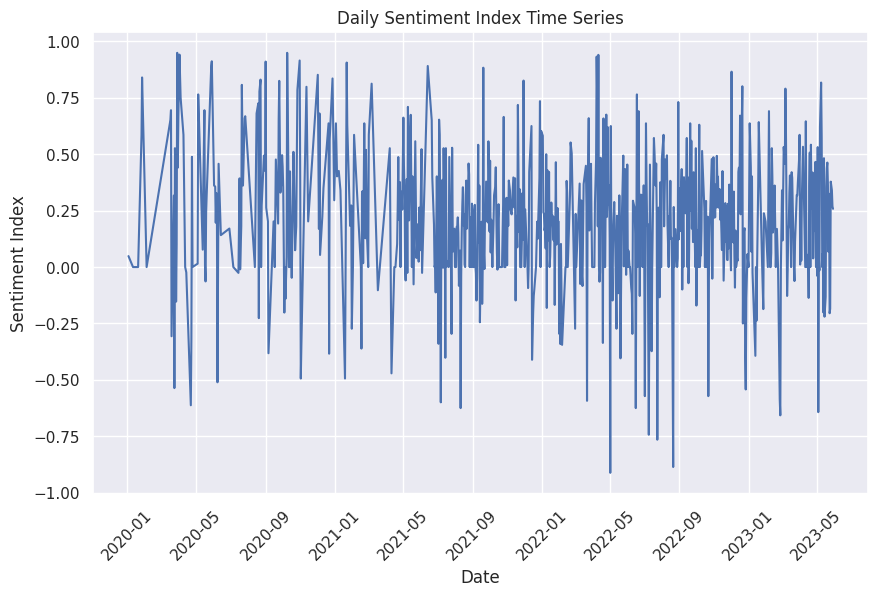

In [ ]:
plot_daily_sentiment_index(daily_sentiment_index)

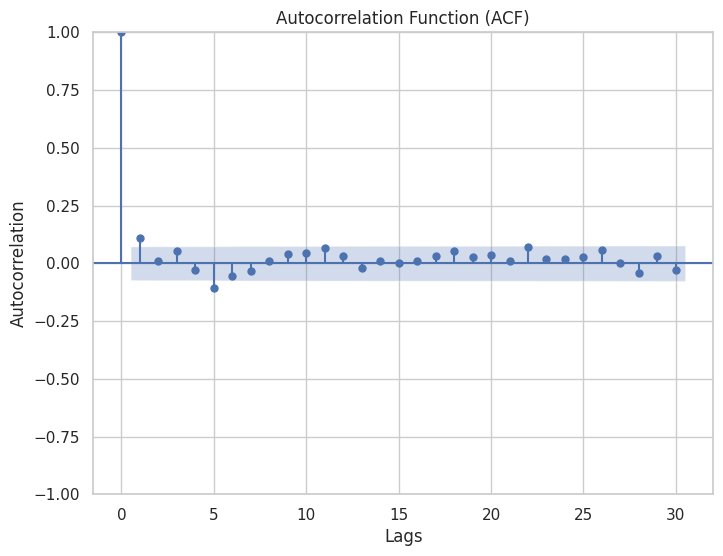

In [ ]:
plot_acf_pacf(daily_sentiment_index)

ADF Test

In [ ]:
adf_test(daily_sentiment_index['sentiment'])

ADF Statistic: -13.024258509166515
p-value: 2.417977965391916e-24
Critical Values:
1%: -3.4393893552577723
5%: -2.8655292671104644
10%: -2.5688943376666744


- ADF Statistic: The ADF statistic is -13.024, indicating strong evidence against the null hypothesis of non-stationarity in the data. The more negative the ADF statistic, the stronger the evidence for stationarity. In this case, the large negative value suggests strong evidence in favor of stationarity in the data.

- p-value: The p-value is 2.418e-24, which is much smaller than any conventional significance level (such as 0.05 or 0.01). The small p-value suggests strong evidence to reject the null hypothesis of non-stationarity and indicates that the data is likely stationary.

- Critical Values: The critical values represent the threshold values that the ADF statistic needs to exceed in order to reject the null hypothesis. The ADF test calculates critical values at different confidence levels (1%, 5%, and 10%). In this case, all the critical values are negative. Since the ADF statistic (-13.024) is more negative than the critical values (-3.439, -2.866, -2.569), we have strong evidence to reject the null hypothesis and conclude that the data is stationary.

In [ ]:
# Get AIC and BIC values for different values of p and q
aic_bic_dict = get_aic_bic_dict(daily_sentiment_index['sentiment'].values, 5, 2, 5)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


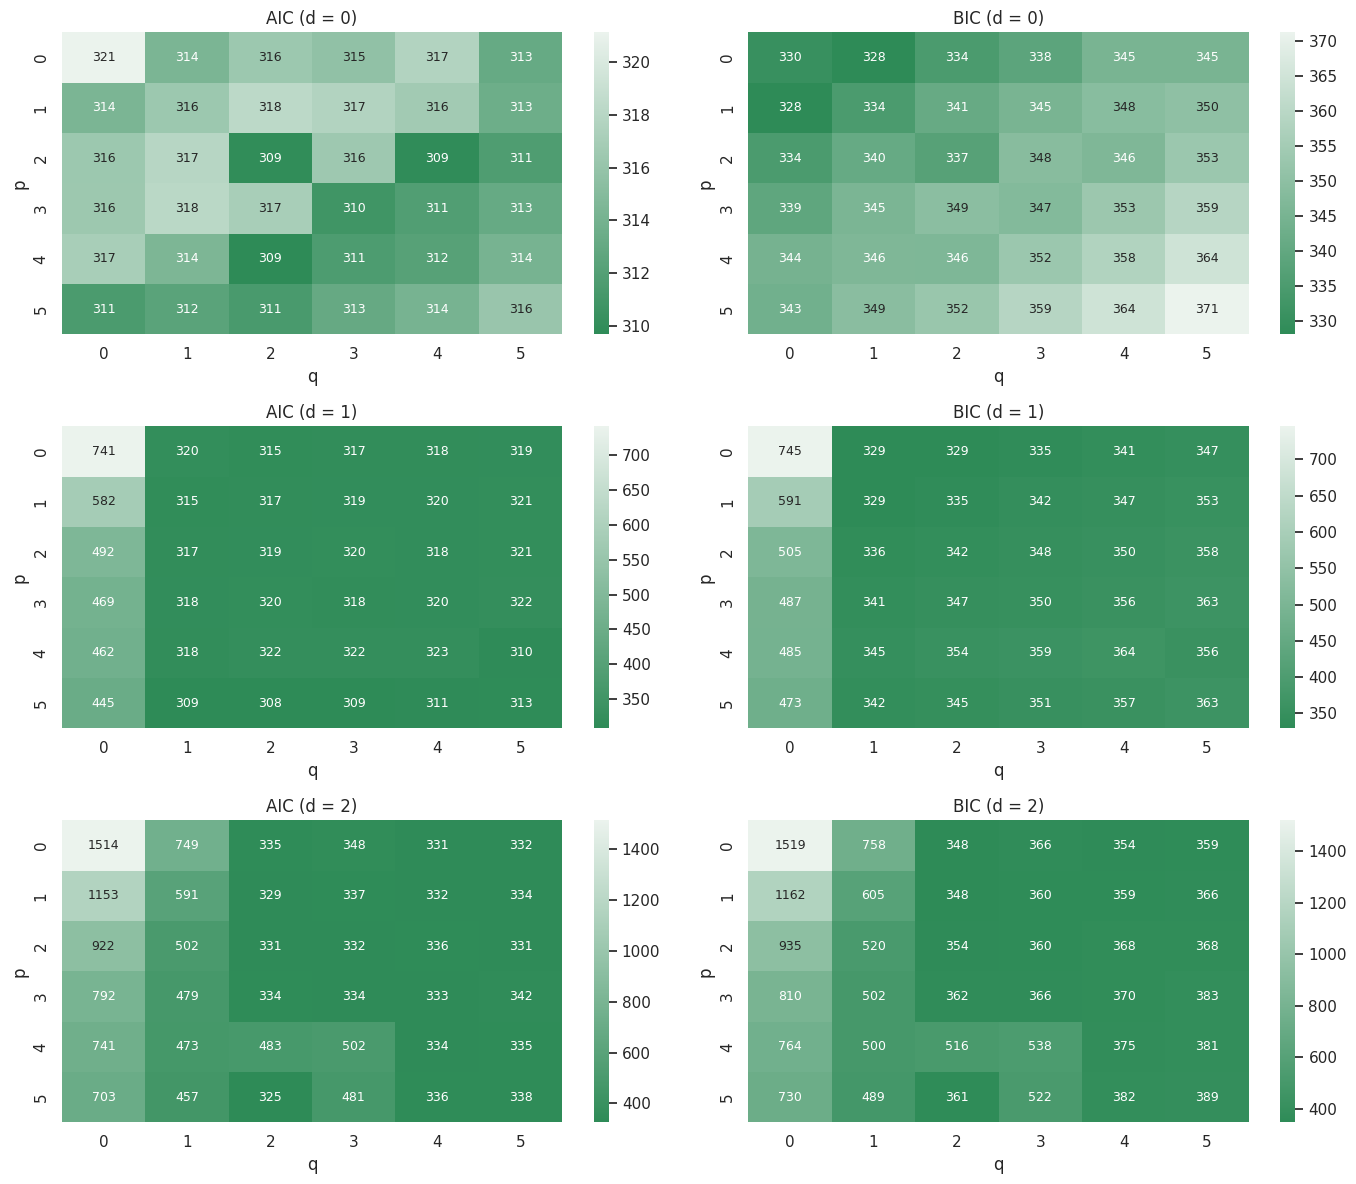

In [ ]:
# Display heatmap
plot_aic_bic_heatmap(aic_bic_dict)

**Comment** Here the lowest value is observed in the model (5,1,2). Hence we select this model.

In [ ]:
# Fit best ARMA model
arima = ARIMA(daily_sentiment_index['sentiment'].values, order = (5, 1, 2))
arima_fit = arima.fit(method_kwargs={"maxiter": 500})
print(arima_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  731
Model:                 ARIMA(5, 1, 2)   Log Likelihood                -146.192
Date:                Thu, 08 Jun 2023   AIC                            308.385
Time:                        20:10:46   BIC                            345.129
Sample:                             0   HQIC                           322.561
                                - 731                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5569      0.218      2.556      0.011       0.130       0.984
ar.L2         -0.0626      0.048     -1.303      0.193      -0.157       0.032
ar.L3          0.0468      0.044      1.068      0.2

In [ ]:
# Run the Ljung-Box test
acorr_ljungbox(arima_fit.resid)

lb_stat  lb_pvalue
1   0.002763   0.958079
2   0.004912   0.997547
3   0.026846   0.998840
4   0.038181   0.999820
5   0.043652   0.999979
6   0.047207   0.999998
7   0.590033   0.999046
8   0.590210   0.999750
9   0.660023   0.999901
10  0.660050   0.999975

**Comment** Based on the Ljungbox result, we can confirm that the lags are not serially correlated.

*Fetching* stock data to continue with the process of evaluation

In [ ]:
# Fetch the log returns for stocks
returns = fetch_log_returns(["AMZN", "NFLX", "UBER", "DKNG", "DE"], '2020-01-01')
returns = pd.concat(returns.values(), axis=1, keys=returns.keys())
returns = returns.reset_index()

In [ ]:
returns = returns.fillna(0)

In [ ]:
sentiment_returns = sentiment_returns_df(daily_sentiment_index, returns)
sentiment_returns

Date  sentiment  num_tweets  num_words_per_tweet     SP500  \
0   2020-01-03   0.048550           2            19.000000 -0.007060   
1   2020-01-27   0.840200           1            32.000000 -0.015731   
2   2020-02-04   0.000000           1            13.000000  0.014980   
3   2020-03-17   0.652150           2            33.000000  0.059955   
4   2020-03-18   0.695100           2            46.000000 -0.051831   
..         ...        ...         ...                  ...       ...   
512 2023-05-23   0.324767           3            36.333333 -0.011222   
513 2023-05-24  -0.204700           2            18.500000 -0.007319   
514 2023-05-25  -0.184820           5            38.600000  0.008758   
515 2023-05-26   0.378469          13            24.000000  0.013049   
516 2023-05-30   0.258117           6            22.166667  0.000017   

         AMZN      NFLX      UBER      DKNG        DE  Average Return  
0   -0.012139 -0.011855  0.012262  0.000000 -0.007407       -0.003828  
1   -0.017887 -0.029109 -0.013587  0.044568 -0.040207       -0.011244  
2    0.022687  0.030754  0.025007  0.004135  0.038790        0.024275  
3    0.070266  0.069971 -0.068014  0.092373  0.055477        0.044015  
4    0.012258 -0.013385 -0.216288 -0.115594 -0.098650       -0.086332  
..        ...       ...       ...       ...       ...             ...  
512 -0.000174 -0.019338 -0.013020 -0.037668 -0.000055       -0.014051  
513  0.015306  0.024888 -0.018107 -0.004944 -0.017754       -0.000122  
514 -0.014989 -0.016034 -0.000263 -0.019048  0.002259       -0.009615  
515  0.044435  0.055376  0.013175 -0.013086  0.006566        0.021293  
516  0.012905  0.037215 -0.023147 -0.003849 -0.018420        0.000941  

[517 rows x 11 columns]

Plotting both the time series

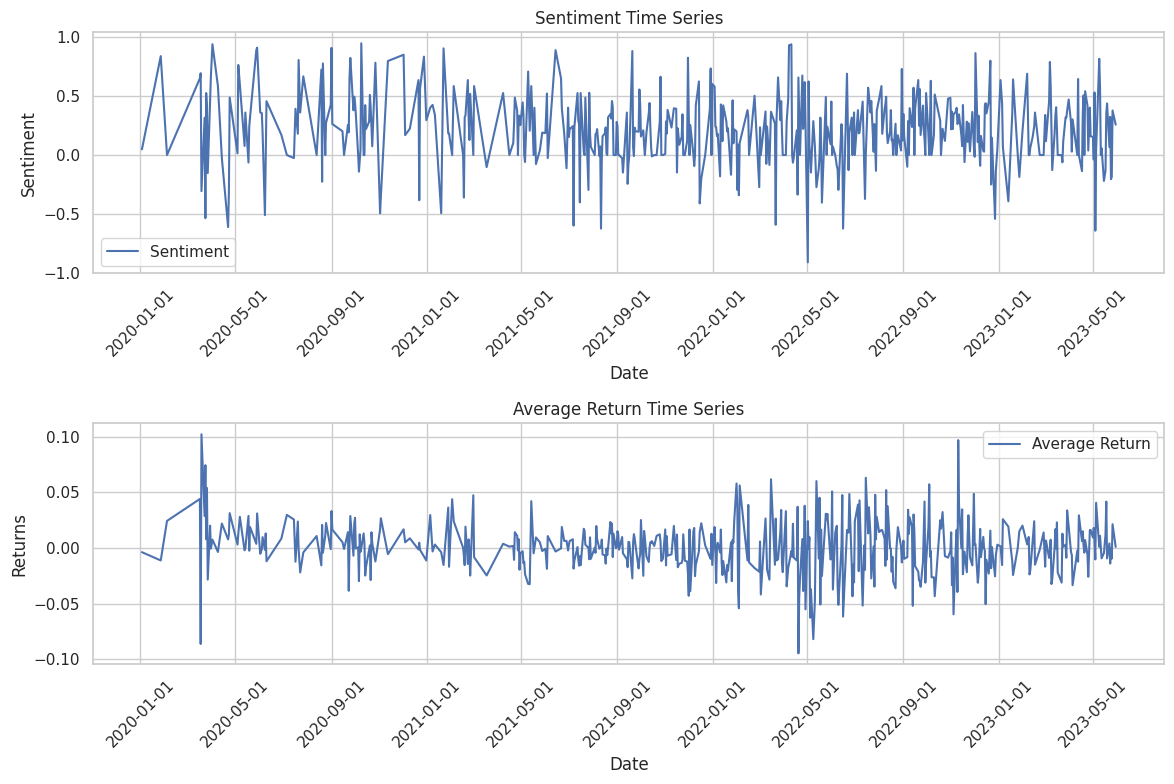

In [ ]:
plot_sentiment_portfolio(sentiment_returns)

In [ ]:
granger_causality_test_portfolio(sentiment_returns)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.2907  , p=0.2564  , df_denom=513, df_num=1
ssr based chi2 test:   chi2=1.2983  , p=0.2545  , df=1
likelihood ratio test: chi2=1.2966  , p=0.2548  , df=1
parameter F test:         F=1.2907  , p=0.2564  , df_denom=513, df_num=1
Lag: 1
Granger Causality Test p-value: 0.2545279239228888



The Granger causality test with a lag of 1 indicates that there is weak evidence to suggest a causal relationship between the variables being tested. The p-value of 0.2545 exceeds the conventional significance level of 0.05, suggesting that the null hypothesis of no Granger causality cannot be rejected at a standard significance level.

In conclusion, based on the results of the Granger causality test, there is insufficient evidence to conclude that one variable Granger-causes the other. Therefore, we do not have strong statistical evidence to support the hypothesis that changes in one variable significantly influence the other variable.

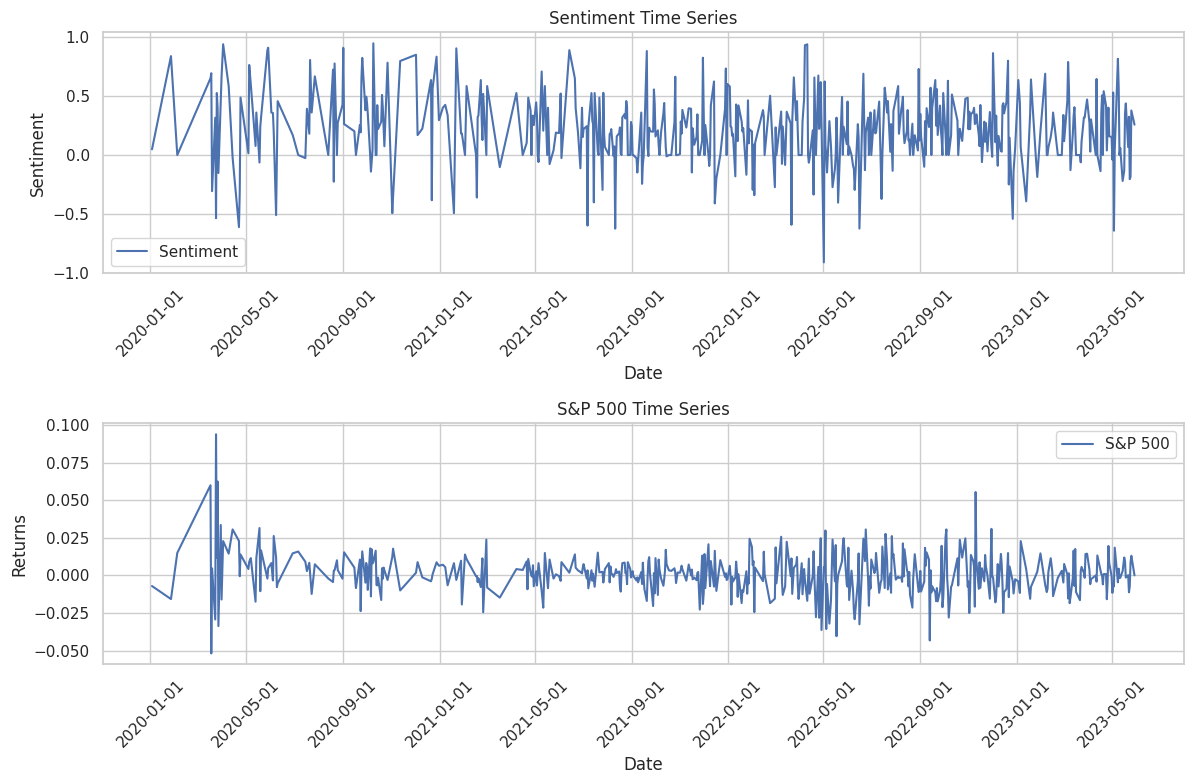

In [ ]:
plot_sentiment_sp500(sentiment_returns)

In [ ]:
granger_causality_test_sp500(sentiment_returns)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.7374  , p=0.3909  , df_denom=513, df_num=1
ssr based chi2 test:   chi2=0.7417  , p=0.3891  , df=1
likelihood ratio test: chi2=0.7412  , p=0.3893  , df=1
parameter F test:         F=0.7374  , p=0.3909  , df_denom=513, df_num=1
Lag: 1
Granger Causality Test p-value: 0.38911467634855024


### 5. Jim Cramer (@jimcramer):

Stocks:
- Advanced Micro Devices, Inc. (AMD)
- Amazon.com, Inc. (AMZN)
- Alphabet Inc. (GOOGL)
- Facebook, Inc. (META)
- Nvidia Corporation (NVDA)

Justification for Stock Selection:

- Jim Cramer is the host of CNBC's "Mad Money," where he provides stock analysis and recommendations. The selected stocks are examples of companies that Jim Cramer has discussed or recommended on his show, making them relevant to his investment focus.

Cutoff Date: January 1, 2020

Justification for Cutoff Date:

- By setting the cutoff date to January 1, 2020, the analysis includes significant market events and aligns with key periods of Jim Cramer's stock recommendations and discussions. This timeframe enables the analysis of the impact of his tweets on these stocks during market-changing events.

Loading the tweets dataset

In [34]:
cramer = pd.read_csv('/content/drive/MyDrive/FInancial Econ HW2/Tweets/tweet_jimcramer.csv')

In [35]:
cramer.shape

(17636, 5)

Preprocess the tweets

In [36]:
cramer_prep = preprocess_tweets(cramer)

Plotting the count of tweets


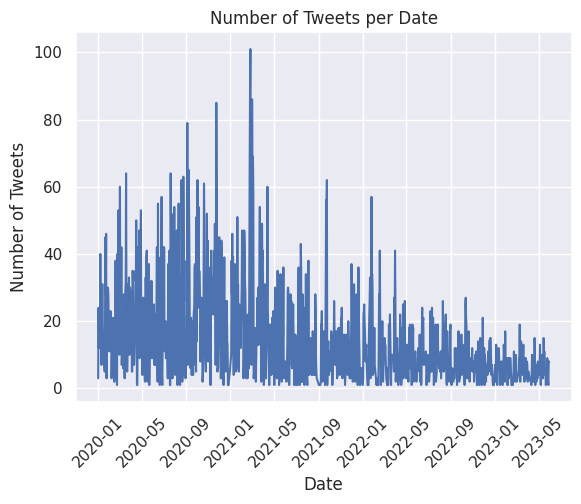

In [37]:
plot_count_of_tweets(cramer_prep)

In [38]:
daily_sentiment_index = calculate_sentiment_index(cramer_prep)
daily_sentiment_index

Date  sentiment  num_tweets  num_words_per_tweet
0     2020-01-02   0.150767           3             8.333333
1     2020-01-03   0.180671          24             8.333333
2     2020-01-04   0.366475          12            21.583333
3     2020-01-05   0.180716          19            17.526316
4     2020-01-06   0.251850          12            11.916667
...          ...        ...         ...                  ...
1135  2023-05-25   0.272978           9            22.000000
1136  2023-05-26   0.045450           4            20.000000
1137  2023-05-28   0.000000           1             1.000000
1138  2023-05-29   0.061125           8            10.750000
1139  2023-05-30   0.192238           8            14.000000

[1140 rows x 4 columns]

Descriptive Statistics

In [39]:
daily_sentiment_index['sentiment'].describe()

count    1140.000000
mean        0.168018
std         0.189771
min        -0.638700
25%         0.058620
50%         0.162525
75%         0.261260
max         0.936200
Name: sentiment, dtype: float64

Daily Sentiment Index

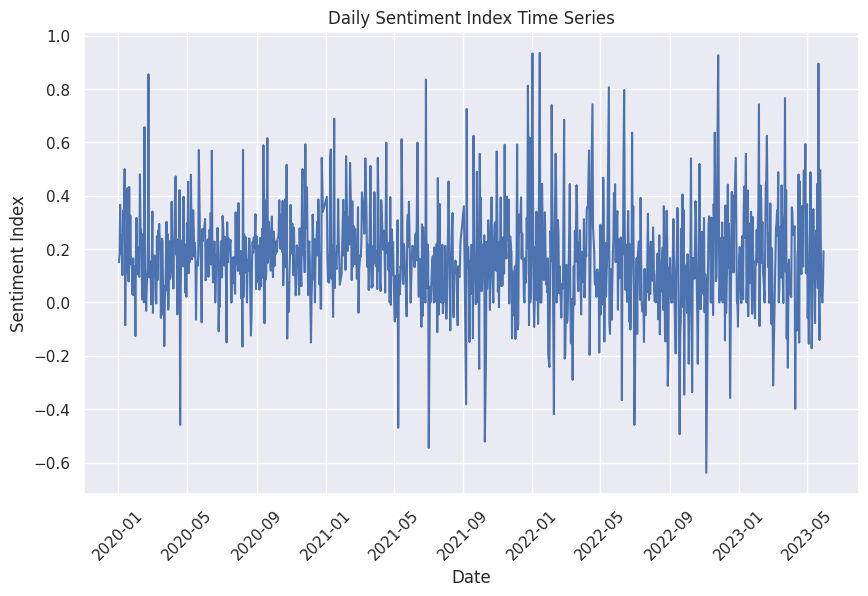

In [40]:
plot_daily_sentiment_index(daily_sentiment_index)

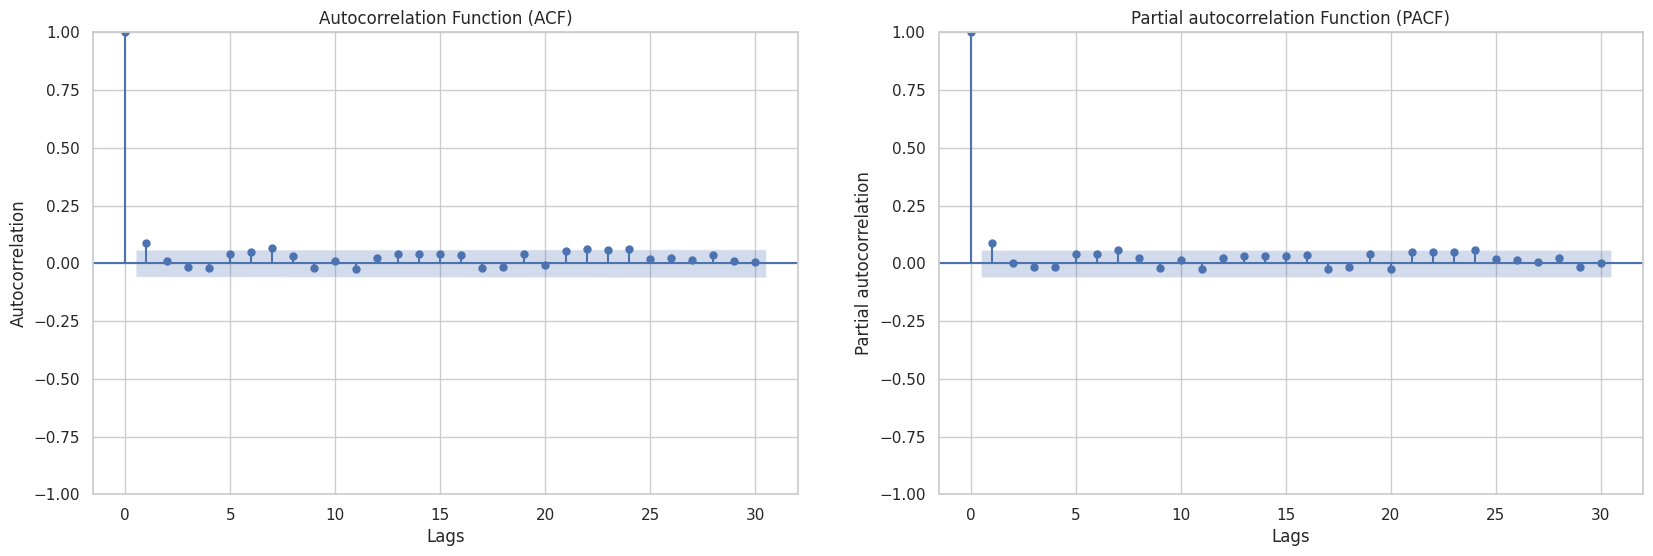

In [41]:
plot_acf_pacf(daily_sentiment_index)

ADF Test

In [42]:
adf_test(daily_sentiment_index['sentiment'])

ADF Statistic: -30.844053351648473
p-value: 0.0
Critical Values:
1%: -3.4361042569951805
5%: -2.8640808675675826
10%: -2.568122823703617



- ADF Statistic: The ADF statistic is -30.844, indicating very strong evidence against the null hypothesis of non-stationarity in the data. The more negative the ADF statistic, the stronger the evidence for stationarity. In this case, the large negative value suggests extremely strong evidence in favor of stationarity in the data.

- p-value: The p-value is 0.0, which is smaller than any conventional significance level (such as 0.05 or 0.01). The small p-value suggests extremely strong evidence to reject the null hypothesis of non-stationarity and indicates that the data is likely stationary.

- Critical Values: The critical values represent the threshold values that the ADF statistic needs to exceed in order to reject the null hypothesis. The ADF test calculates critical values at different confidence levels (1%, 5%, and 10%). In this case, all the critical values are negative. Since the ADF statistic (-30.844) is much more negative than the critical values (-3.436, -2.864, -2.568), we have extremely strong evidence to reject the null hypothesis and conclude that the data is stationary.-

In [43]:
# Get AIC and BIC values for different values of p and q
aic_bic_dict = get_aic_bic_dict(daily_sentiment_index['sentiment'].values, 5, 2, 5)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


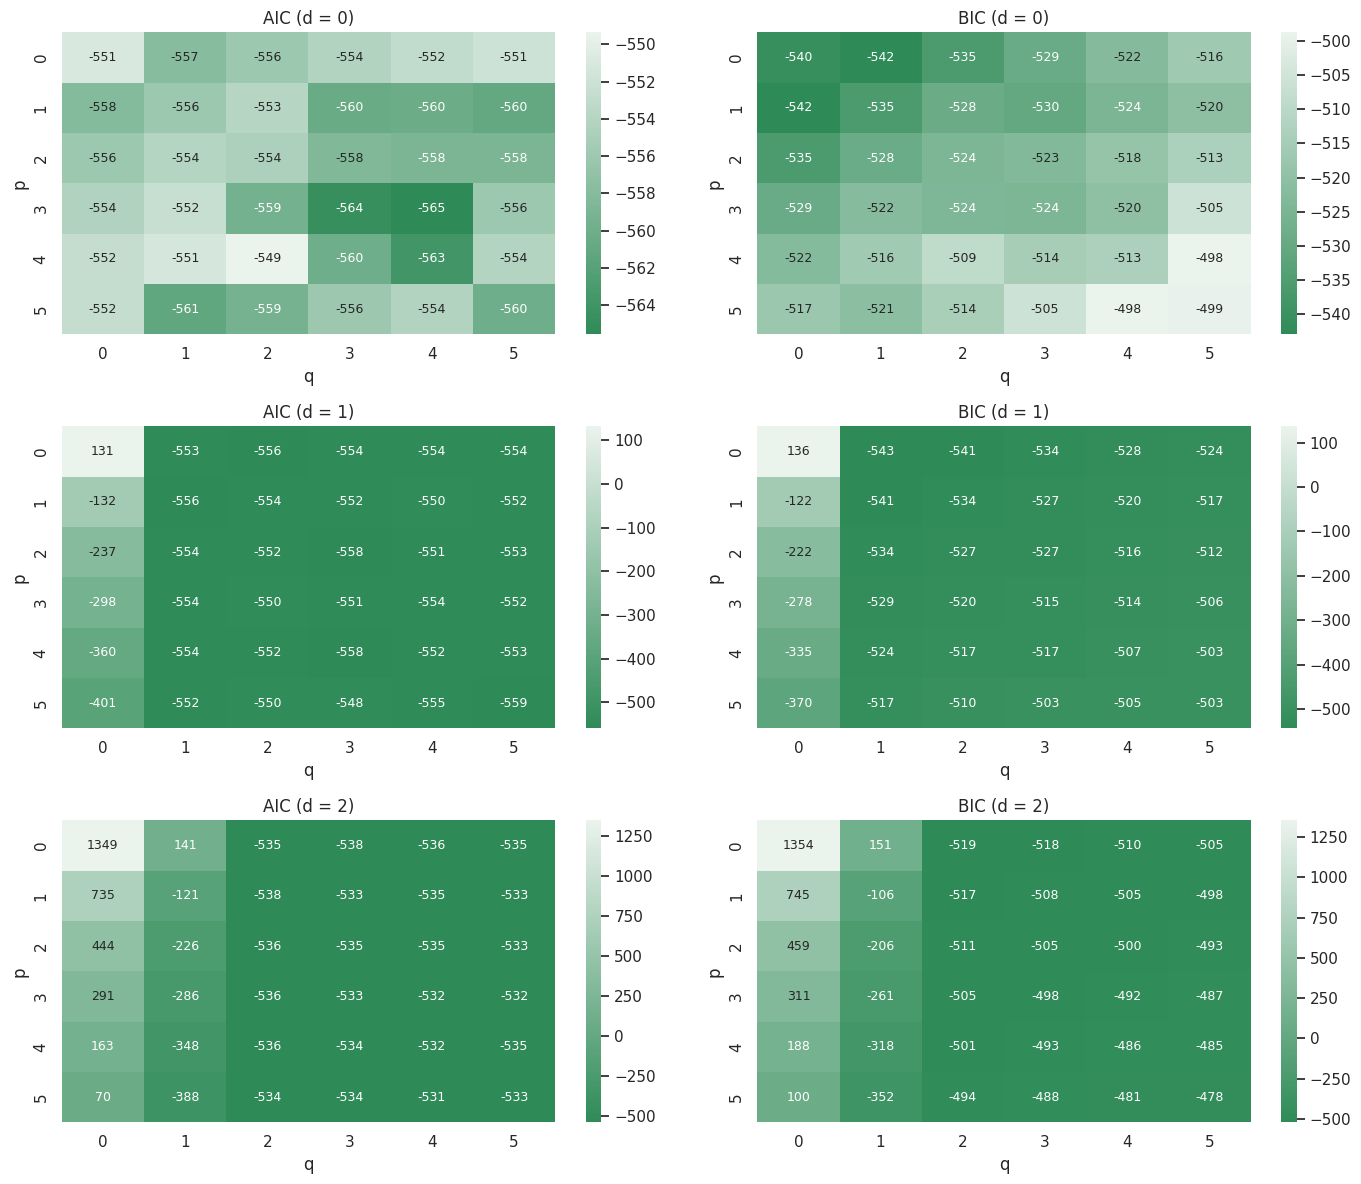

In [44]:
# Display heatmap
plot_aic_bic_heatmap(aic_bic_dict)

**Comment** Based on the AIC BIC heatmap, we select model (3,0,4).

In [45]:
# Fit best ARMA model
arima = ARIMA(daily_sentiment_index['sentiment'].values, order = (3, 0, 4))
arima_fit = arima.fit(method_kwargs={"maxiter": 500})
print(arima_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1140
Model:                 ARIMA(3, 0, 4)   Log Likelihood                 291.777
Date:                Thu, 08 Jun 2023   AIC                           -565.555
Time:                        20:03:59   BIC                           -520.205
Sample:                             0   HQIC                          -548.429
                               - 1140                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1692      0.012     13.890      0.000       0.145       0.193
ar.L1          2.2919      0.059     39.069      0.000       2.177       2.407
ar.L2         -2.2126      0.097    -22.805      0.0

In [46]:
# Run the Ljung-Box test
acorr_ljungbox(arima_fit.resid)

lb_stat  lb_pvalue
1   0.001053   0.974116
2   0.246260   0.884149
3   0.246294   0.969791
4   0.809510   0.937169
5   0.861853   0.972922
6   1.102330   0.981434
7   1.106038   0.992932
8   1.285615   0.995722
9   2.896881   0.968243
10  3.271685   0.974288

**Comment** Based on the results of Ljungbox test, we can confirm that the ARIMA (3,0,4) is not a bad choice.

*Fetching* stock data to continue with the process of evaluation

In [ ]:
# Fetch the log returns for stocks
returns = fetch_log_returns(["AMD", "AMZN", "GOOGL", "META", "NVDA"], '2020-01-01')
returns = pd.concat(returns.values(), axis=1, keys=returns.keys())
returns = returns.reset_index()

In [ ]:
returns = returns.fillna(0)

In [ ]:
sentiment_returns = sentiment_returns_df(daily_sentiment_index, returns)
sentiment_returns

Date  sentiment  num_tweets  num_words_per_tweet     SP500  \
0   2020-01-03   0.180671          24             8.333333 -0.007060   
1   2020-01-06   0.251850          12            11.916667  0.003533   
2   2020-01-07   0.229693          15            12.666667 -0.002803   
3   2020-01-08   0.102715          40            15.150000  0.004902   
4   2020-01-09   0.344350          16            15.312500  0.006655   
..         ...        ...         ...                  ...       ...   
826 2023-05-23  -0.140500           3             7.666667 -0.011222   
827 2023-05-24   0.496267           3             9.333333 -0.007319   
828 2023-05-25   0.272978           9            22.000000  0.008758   
829 2023-05-26   0.045450           4            20.000000  0.013049   
830 2023-05-30   0.192238           8            14.000000  0.000017   

          AMD      AMZN     GOOGL      META      NVDA  Average Return  
0   -0.010183 -0.012139 -0.005231 -0.005291 -0.016006       -0.009770  
1   -0.004321  0.014886  0.026654  0.018834  0.004194        0.012049  
2   -0.002893  0.002092 -0.001932  0.002164  0.012107        0.002307  
3   -0.008705 -0.007809  0.007118  0.010138  0.001876        0.000524  
4    0.023834  0.004799  0.010498  0.014311  0.010983        0.012885  
..        ...       ...       ...       ...       ...             ...  
826  0.001111 -0.000174 -0.019912 -0.006363 -0.015653       -0.008198  
827  0.001387  0.015306 -0.013544  0.010011 -0.004888        0.001654  
828  0.111573 -0.014989  0.021340  0.013964  0.243696        0.075117  
829  0.055505  0.044435  0.009151  0.037002  0.025434        0.034305  
830 -0.013855  0.012905 -0.007544  0.001832  0.029913        0.004650  

[831 rows x 11 columns]

Plotting both the time series

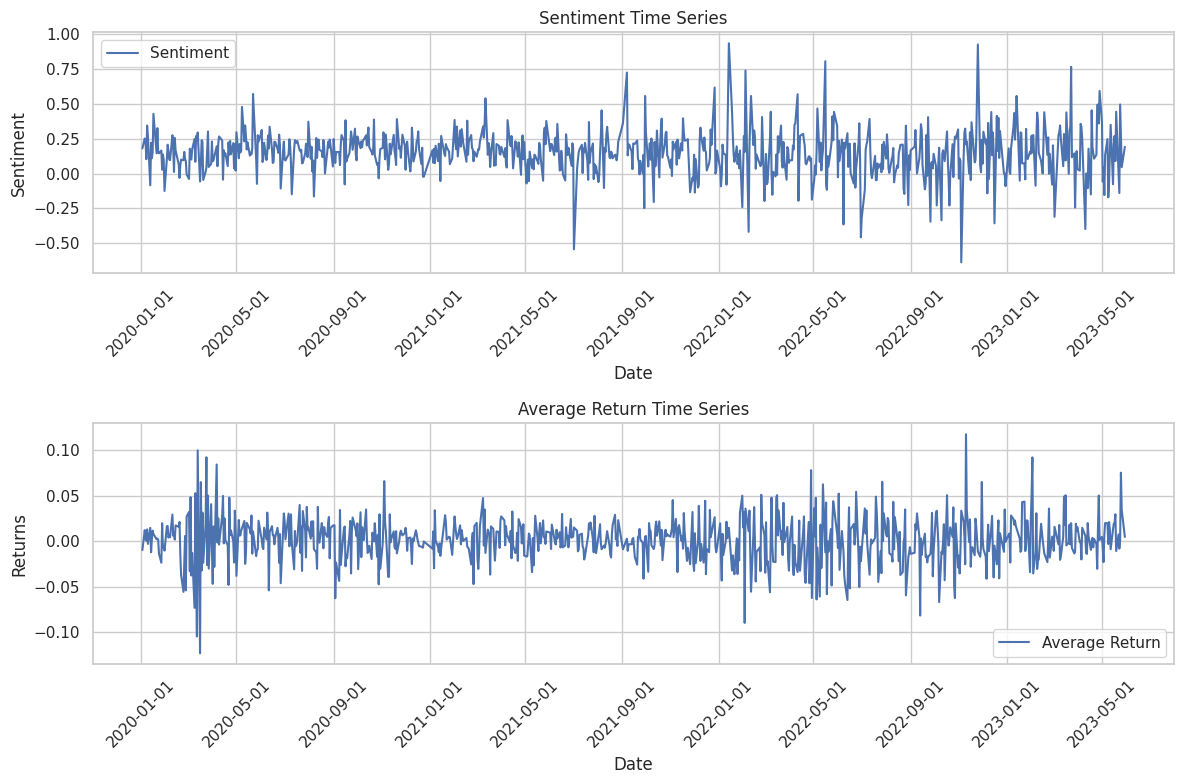

In [ ]:
plot_sentiment_portfolio(sentiment_returns)

In [ ]:
granger_causality_test_portfolio(sentiment_returns)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.4364  , p=0.5091  , df_denom=827, df_num=1
ssr based chi2 test:   chi2=0.4380  , p=0.5081  , df=1
likelihood ratio test: chi2=0.4379  , p=0.5082  , df=1
parameter F test:         F=0.4364  , p=0.5091  , df_denom=827, df_num=1
Lag: 1
Granger Causality Test p-value: 0.508102380631525




The Granger causality test with a lag of 1 indicates that there is weak evidence to suggest a causal relationship between the variables being tested. The p-value of 0.5081 exceeds the conventional significance level of 0.05, suggesting that the null hypothesis of no Granger causality cannot be rejected at a standard significance level.

Based on these results, there is insufficient evidence to conclude that one variable Granger-causes the other. The lack of statistical significance indicates that changes in one variable may not significantly influence the other variable. Therefore, we do not have strong statistical evidence to support the hypothesis that changes in one variable have a causal effect on the other variable.

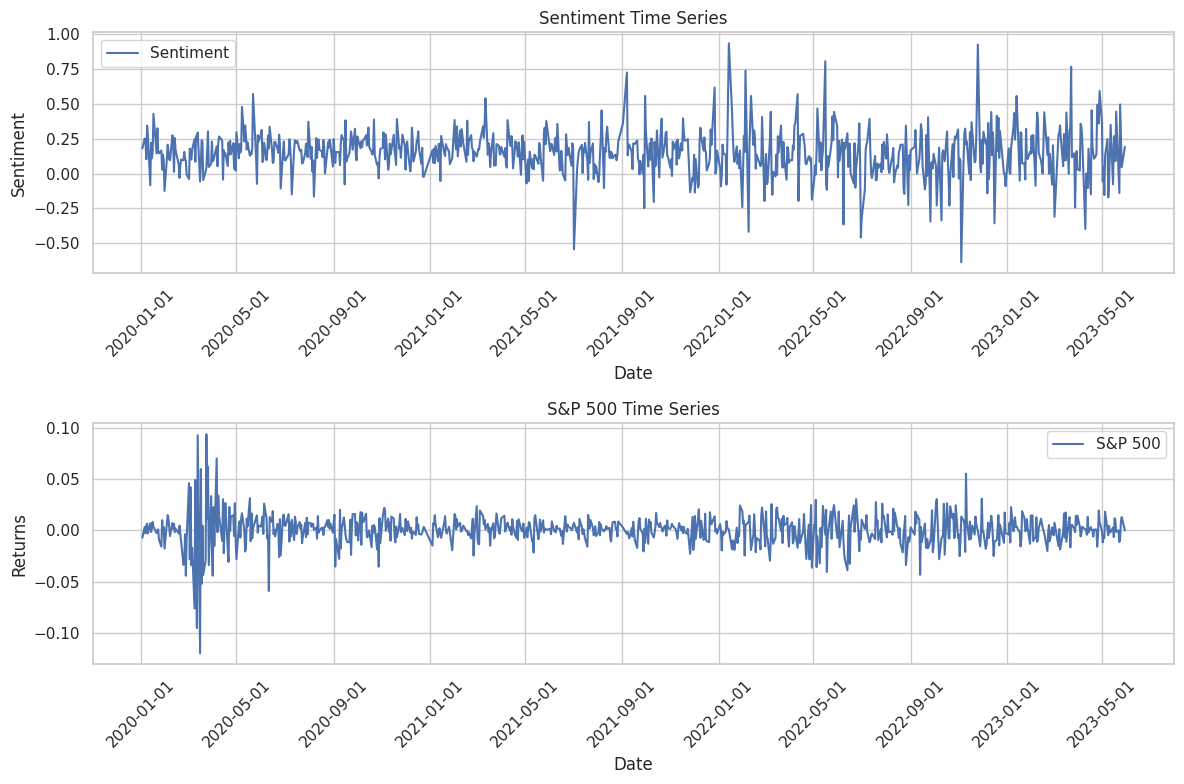

In [ ]:
plot_sentiment_sp500(sentiment_returns)

In [ ]:
granger_causality_test_sp500(sentiment_returns)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.6595  , p=0.4170  , df_denom=827, df_num=1
ssr based chi2 test:   chi2=0.6619  , p=0.4159  , df=1
likelihood ratio test: chi2=0.6616  , p=0.4160  , df=1
parameter F test:         F=0.6595  , p=0.4170  , df_denom=827, df_num=1
Lag: 1
Granger Causality Test p-value: 0.4159058389056214
